<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [622]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

#### Ref : https://stackoverflow.com/questions/6740918/creating-a-dictionary-from-a-csv-file

In [623]:
scores_csv_path = './datasets/sat_scores.csv'
print("Opening File.....")
with open(scores_csv_path, mode='r') as infile:
    reader = csv.reader(infile)
    scores_dict={}
    for rows in reader:
        k = rows[0]
        values = rows[1:]
        v = [int(v) if v.isnumeric() else v for v in values]
        scores_dict.update({k:v})
    print(scores_dict)
print("File is closed.....")

Opening File.....
{'State': ['Rate', 'Verbal', 'Math'], 'CT': [82, 509, 510], 'NJ': [81, 499, 513], 'MA': [79, 511, 515], 'NY': [77, 495, 505], 'NH': [72, 520, 516], 'RI': [71, 501, 499], 'PA': [71, 500, 499], 'VT': [69, 511, 506], 'ME': [69, 506, 500], 'VA': [68, 510, 501], 'DE': [67, 501, 499], 'MD': [65, 508, 510], 'NC': [65, 493, 499], 'GA': [63, 491, 489], 'IN': [60, 499, 501], 'SC': [57, 486, 488], 'DC': [56, 482, 474], 'OR': [55, 526, 526], 'FL': [54, 498, 499], 'WA': [53, 527, 527], 'TX': [53, 493, 499], 'HI': [52, 485, 515], 'AK': [51, 514, 510], 'CA': [51, 498, 517], 'AZ': [34, 523, 525], 'NV': [33, 509, 515], 'CO': [31, 539, 542], 'OH': [26, 534, 439], 'MT': [23, 539, 539], 'WV': [18, 527, 512], 'ID': [17, 543, 542], 'TN': [13, 562, 553], 'NM': [13, 551, 542], 'IL': [12, 576, 589], 'KY': [12, 550, 550], 'WY': [11, 547, 545], 'MI': [11, 561, 572], 'MN': [9, 580, 589], 'KS': [9, 577, 580], 'AL': [9, 559, 554], 'NE': [8, 562, 568], 'OK': [8, 567, 561], 'MO': [8, 577, 577], 'LA'

In [624]:
type(scores_dict['CT'][0])

int

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [625]:
scores = pd.DataFrame(scores_dict)
scores_df =scores.T
print(scores_df.head())
print('******************')
scores_df.reset_index(level=0, inplace=True)
print(scores_df.iloc[0])
scores_df.rename(columns=scores_df.iloc[0],inplace=True)
scores_df.drop(scores_df.index[0],inplace=True)
scores_df.head()

          0       1     2
State  Rate  Verbal  Math
CT       82     509   510
NJ       81     499   513
MA       79     511   515
NY       77     495   505
******************
index     State
0          Rate
1        Verbal
2          Math
Name: 0, dtype: object


,State,Rate,Verbal,Math
1,CT,82,509,510
2,NJ,81,499,513
3,MA,79,511,515
4,NY,77,495,505
5,NH,72,520,516


In [626]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 52
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null object
Verbal    52 non-null object
Math      52 non-null object
dtypes: object(4)
memory usage: 2.0+ KB


In [627]:
scores_df['Rate'] = scores_df['Rate'].astype(int)
scores_df['Verbal'] = scores_df['Verbal'].astype(int)
scores_df['Math'] = scores_df['Math'].astype(int)

In [628]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 52
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


### Answer : 
If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [629]:
scores_df.head(10)

,State,Rate,Verbal,Math
1,CT,82,509,510
2,NJ,81,499,513
3,MA,79,511,515
4,NY,77,495,505
5,NH,72,520,516
6,RI,71,501,499
7,PA,71,500,499
8,VT,69,511,506
9,ME,69,506,500
10,VA,68,510,501


In [694]:
scores_df.describe()

,Rate,Verbal,Math,Verbal-Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


### Answer :
- Head(10), showing first 10 rows, can generally tell what are the column headers, what types of data and how many columns and is there any missing data or in appropiate characters in columns and data.
- For unique and null checking, info() and unique() functions are good to use.
- For statistical overview, use describe function.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [636]:
data_dict = scores.to_dict()
data_dict

{'State': {0: 'Rate', 1: 'Verbal', 2: 'Math'},
 'CT': {0: 82, 1: 509, 2: 510},
 'NJ': {0: 81, 1: 499, 2: 513},
 'MA': {0: 79, 1: 511, 2: 515},
 'NY': {0: 77, 1: 495, 2: 505},
 'NH': {0: 72, 1: 520, 2: 516},
 'RI': {0: 71, 1: 501, 2: 499},
 'PA': {0: 71, 1: 500, 2: 499},
 'VT': {0: 69, 1: 511, 2: 506},
 'ME': {0: 69, 1: 506, 2: 500},
 'VA': {0: 68, 1: 510, 2: 501},
 'DE': {0: 67, 1: 501, 2: 499},
 'MD': {0: 65, 1: 508, 2: 510},
 'NC': {0: 65, 1: 493, 2: 499},
 'GA': {0: 63, 1: 491, 2: 489},
 'IN': {0: 60, 1: 499, 2: 501},
 'SC': {0: 57, 1: 486, 2: 488},
 'DC': {0: 56, 1: 482, 2: 474},
 'OR': {0: 55, 1: 526, 2: 526},
 'FL': {0: 54, 1: 498, 2: 499},
 'WA': {0: 53, 1: 527, 2: 527},
 'TX': {0: 53, 1: 493, 2: 499},
 'HI': {0: 52, 1: 485, 2: 515},
 'AK': {0: 51, 1: 514, 2: 510},
 'CA': {0: 51, 1: 498, 2: 517},
 'AZ': {0: 34, 1: 523, 2: 525},
 'NV': {0: 33, 1: 509, 2: 515},
 'CO': {0: 31, 1: 539, 2: 542},
 'OH': {0: 26, 1: 534, 2: 439},
 'MT': {0: 23, 1: 539, 2: 539},
 'WV': {0: 18, 1: 527, 2:

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [637]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 52
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


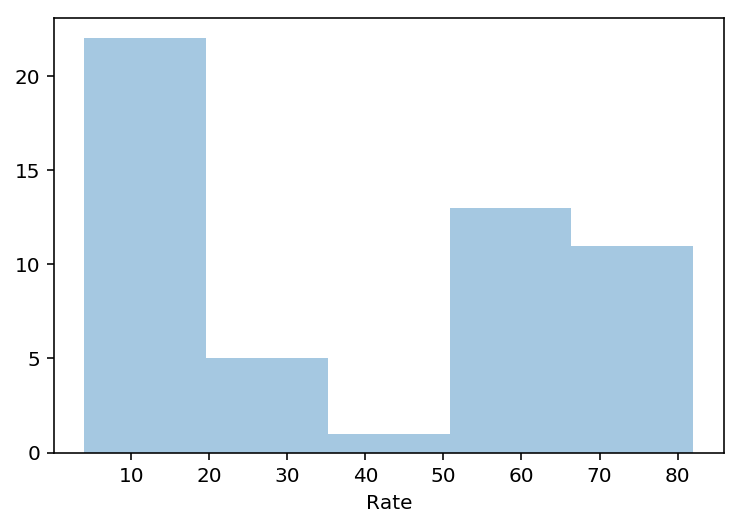

In [638]:
sns.distplot(scores_df.Rate, kde = False, bins = 5)

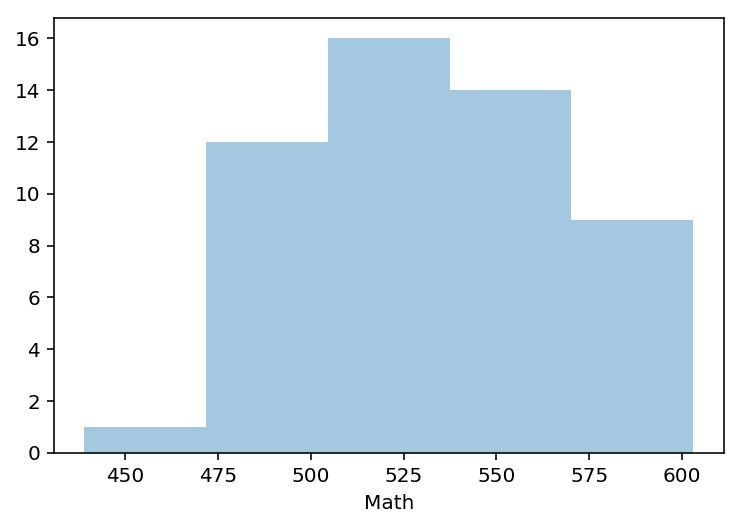

In [639]:
sns.distplot(scores_df.Math, kde = False, bins = 5)

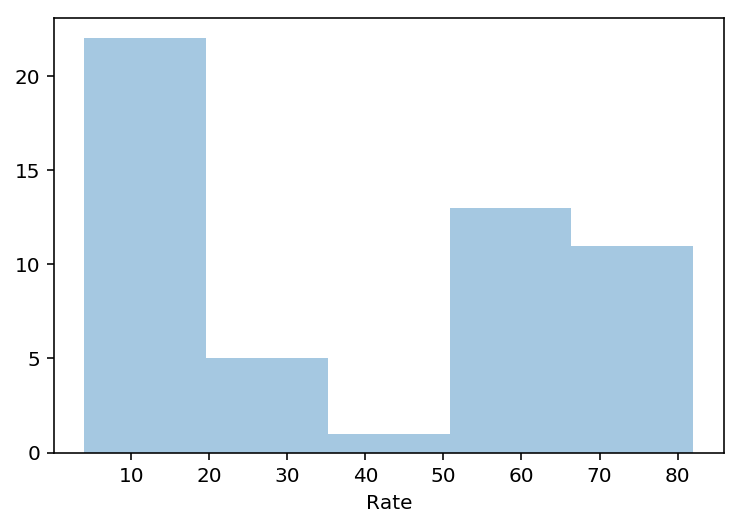

In [640]:
sns.distplot(scores_df.Rate, kde = False, bins = 5)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

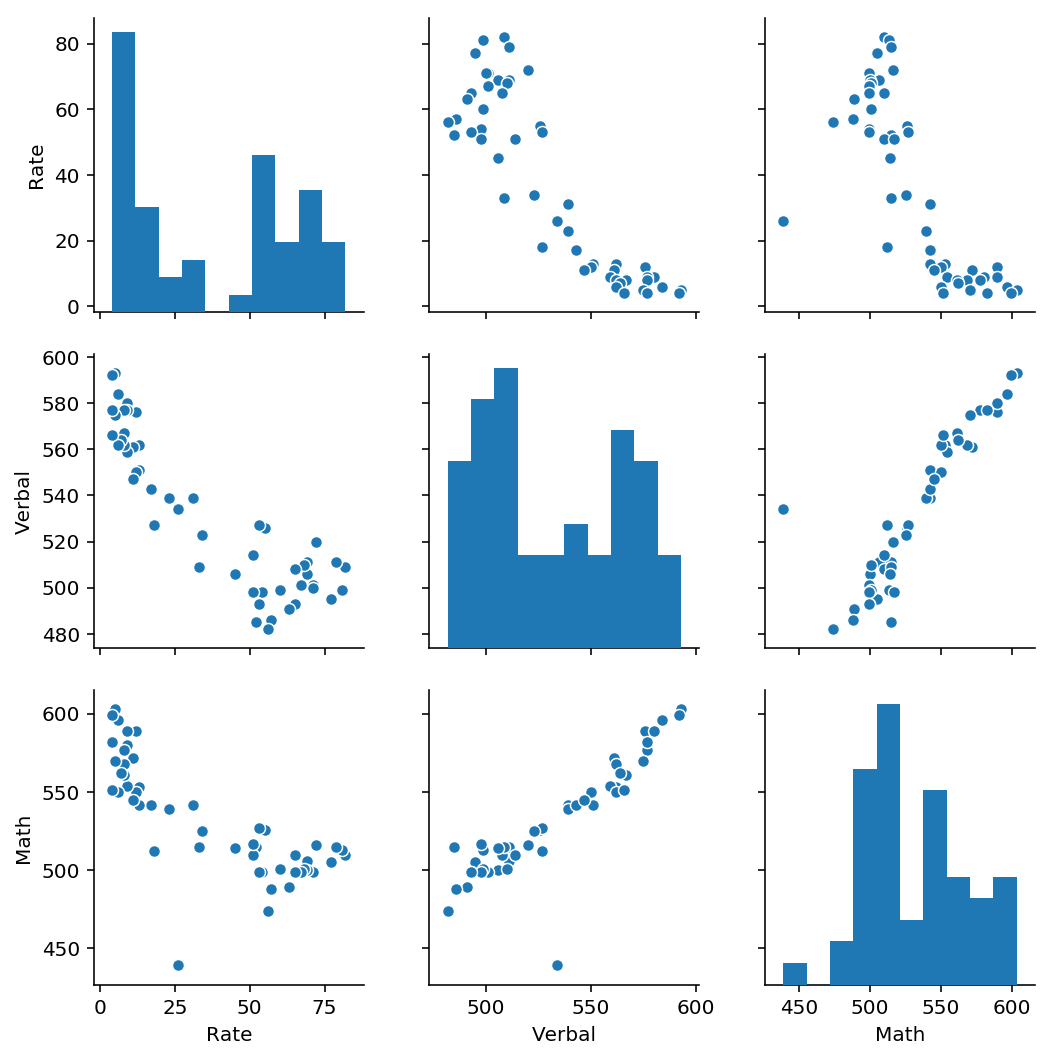

In [641]:
sns.pairplot(scores_df)

### Answer :
- This pairplot can tell the correlations between Rate, Math and Vebal by looking at the scratter plots and data spreading/distribution by looking at the histogram.
- This is usually very helpful to see overview of dataset in one diagram.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

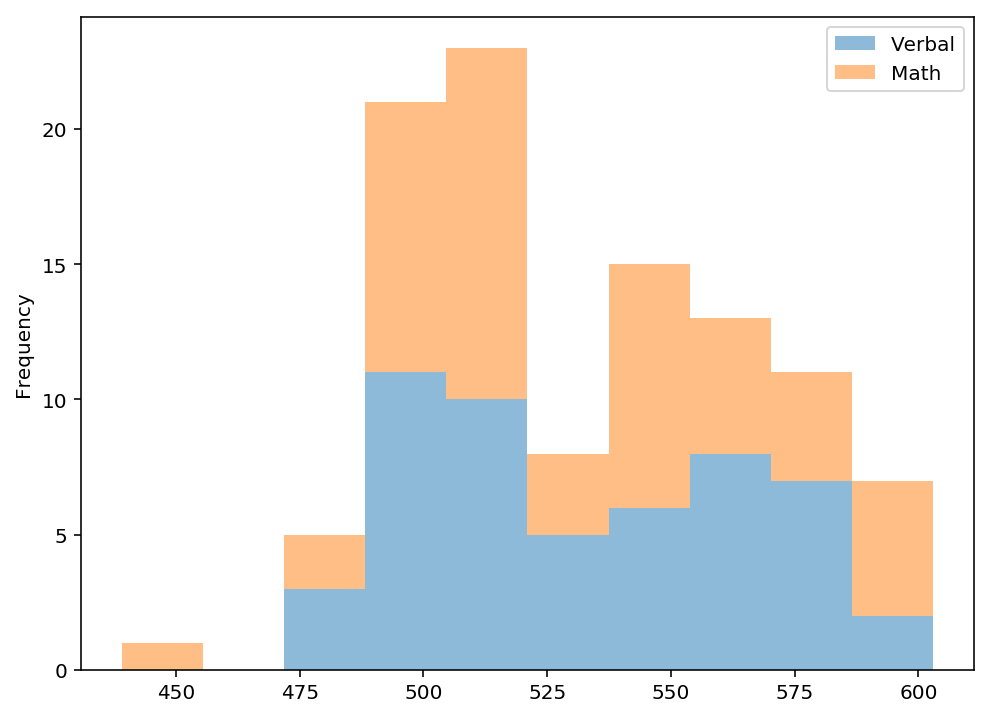

In [642]:
scores_df.drop(['Rate'],axis=1).plot.hist(alpha=0.5, stacked = True, figsize = (8,6))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

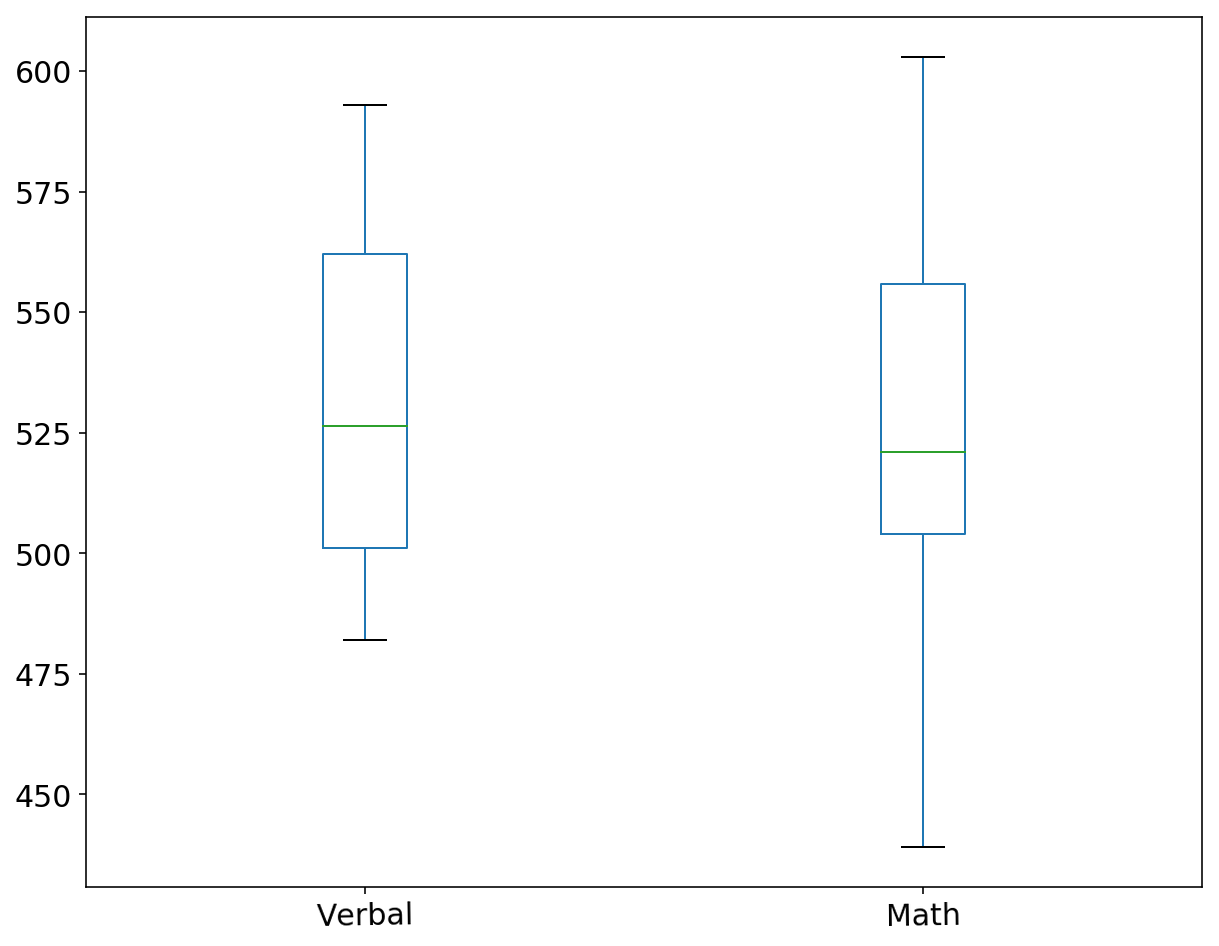

In [644]:
scores_df.drop(['Rate'],axis=1).plot(kind = 'box', figsize = (10,8), rot = 1, fontsize = 15)

### Answer :
- Benefits are we can observe the median, interquantile range, min and max in one go. It can even say if the data distribution is symmetrical or not and how data is skewed.
- Besides, it can show outliers if any.
- If Rate is plotted in same chart, data in Rate are quite low compared to Verbal and Math which can cause large value gap in between and it will cause the viwer to feel unesay and hard to observe the chart.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


### Solution 1 - Standardized Variables Together

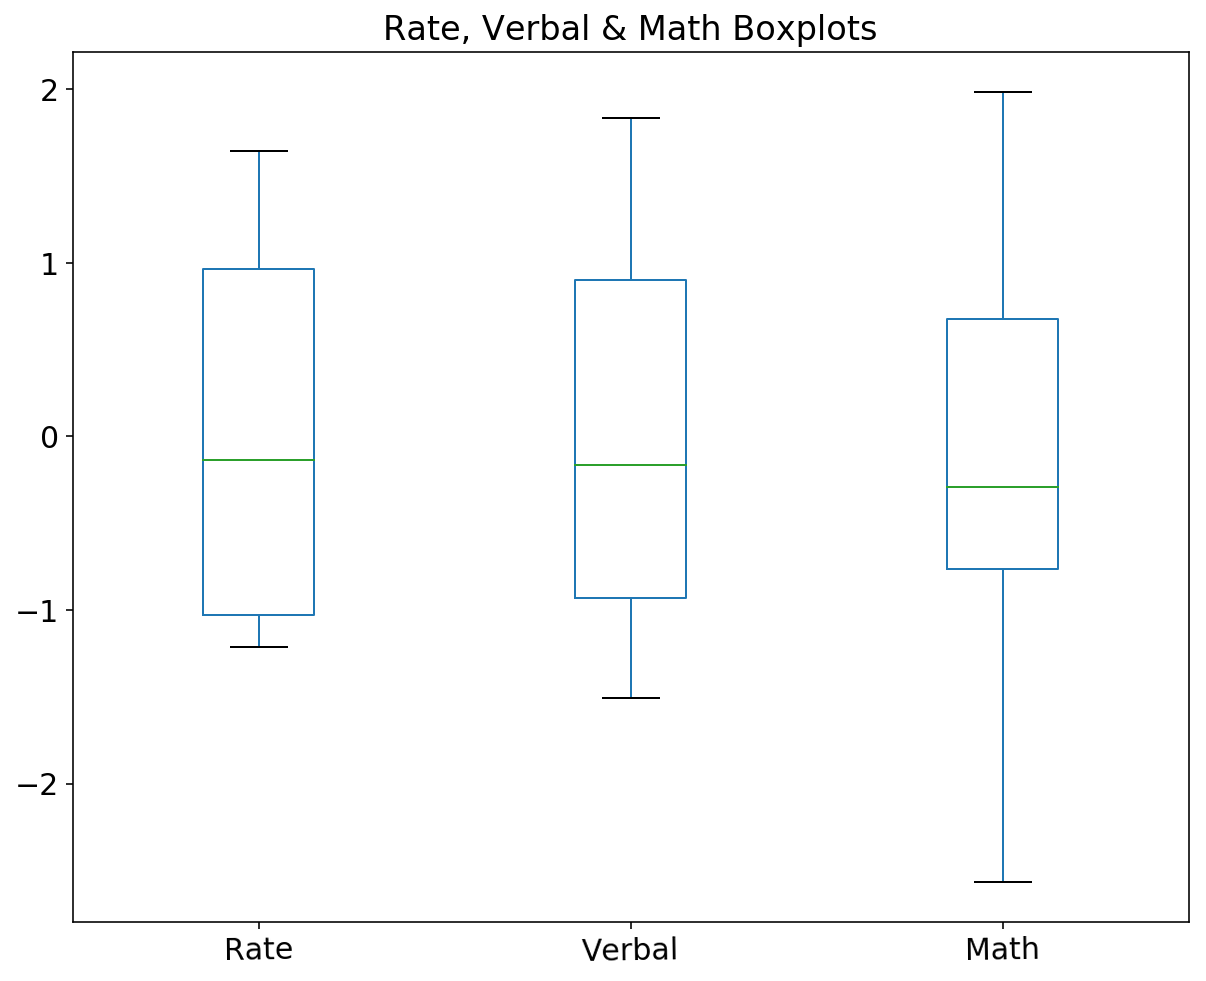

In [645]:
new_scores_df = scores_df.drop('State',axis=1)
new_scores_df_stand = (new_scores_df - new_scores_df.mean()) / new_scores_df.std()
plt.rcParams.update({'font.size': 14})
new_scores_df_stand.plot(kind = 'box',
               figsize = (10,8),
               title = 'Rate, Verbal & Math Boxplots',
               rot = 1, 
               fontsize = 15)

### Solution 2 - Without Standardization

##### Ref : https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

Rate         AxesSubplot(0.125,0.125;0.227941x0.755)
Verbal    AxesSubplot(0.398529,0.125;0.227941x0.755)
Math      AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

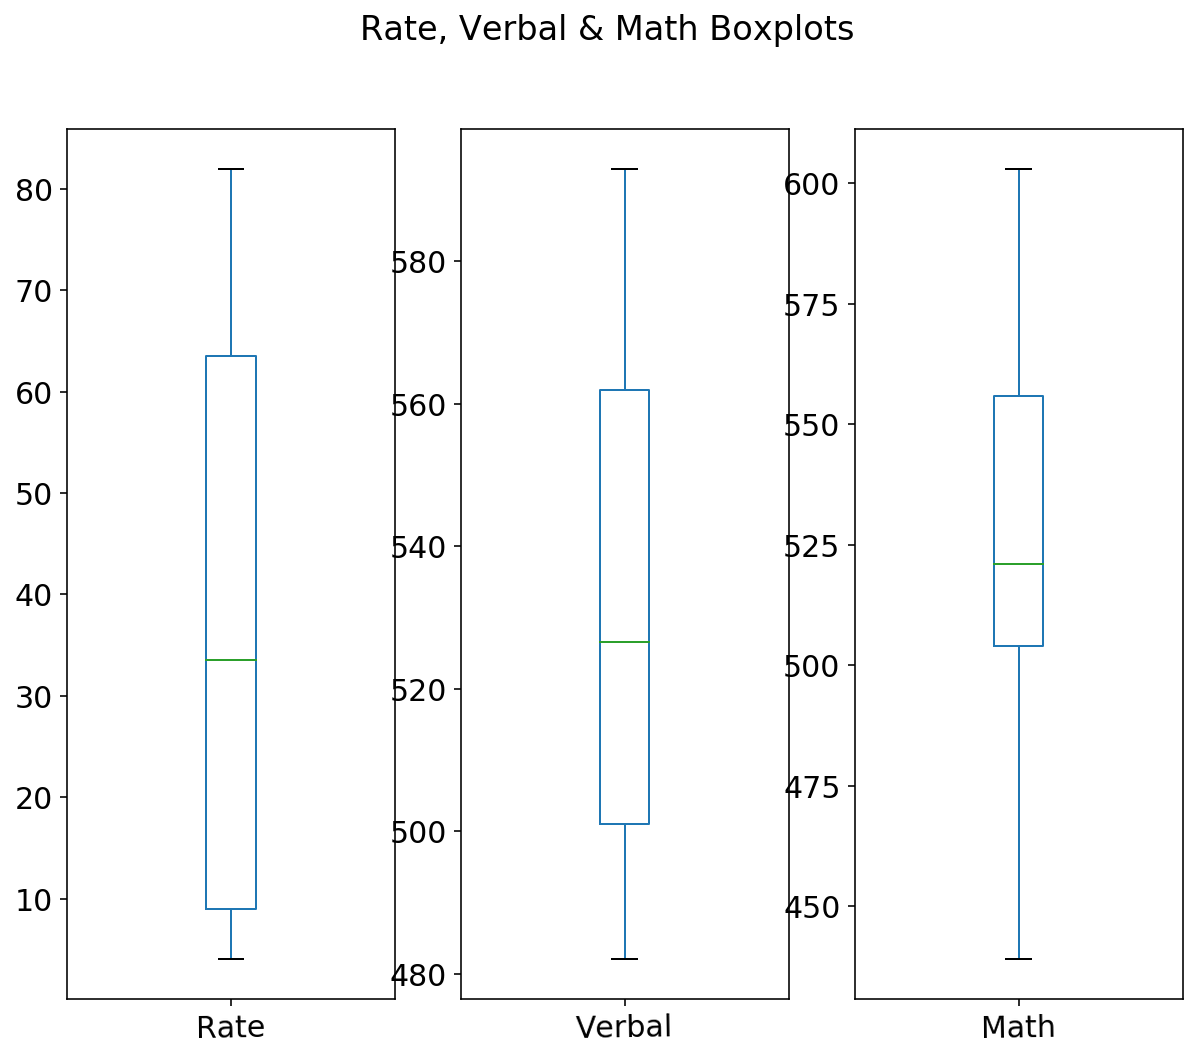

In [646]:
plt.rcParams.update({'font.size': 14})
scores_df.plot(kind = 'box',
               subplots = True,
               figsize = (10,8),
               title = 'Rate, Verbal & Math Boxplots',
               rot = 1, 
               fontsize = 15)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [647]:
scores_df['Verbal'].mean()

532.0192307692307

In [648]:
scores_df[scores_df['Verbal'] > scores_df['Verbal'].mean()].count()['State']

24

### Answer :
Total 24 states are above the mean of Verbal out of 52 states (based on scores_df['State'].describe()). It means the data is not contributed equally with states. This can tell that Data in Verbal is skewed to positive side with outliers in these 24 states.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [649]:
scores_df['Verbal'].median()

526.5

In [650]:
scores_df[scores_df['Verbal'] > scores_df['Verbal'].median()].count()['State']

26

### Answer :
Total 26 states are above the median of Verbal out of 52 states (based on scores_df['State'].describe()). It means states are contributing equally and more than the countries above the mean. This confirms that Data in Verbal is skewed to positive side with outliers in these 24 states.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [651]:
scores_df['Verbal-Math'] = scores_df['Verbal'] -scores_df['Math']
scores_df.head()

,State,Rate,Verbal,Math,Verbal-Math
1,CT,82,509,510,-1
2,NJ,81,499,513,-14
3,MA,79,511,515,-4
4,NY,77,495,505,-10
5,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [652]:
scores_df

,State,Rate,Verbal,Math,Verbal-Math
1,CT,82,509,510,-1
2,NJ,81,499,513,-14
3,MA,79,511,515,-4
4,NY,77,495,505,-10
5,NH,72,520,516,4
6,RI,71,501,499,2
7,PA,71,500,499,1
8,VT,69,511,506,5
9,ME,69,506,500,6
10,VA,68,510,501,9


In [653]:
tempdf = scores_df.copy()
tempdf.sort_values(by='Verbal-Math', ascending = False,inplace = True)
df1 = tempdf.head(10)
df1.reset_index(drop=True,inplace=True)
df1

,State,Rate,Verbal,Math,Verbal-Math
0,OH,26,534,439,95
1,MS,4,566,551,15
2,WV,18,527,512,15
3,AR,6,562,550,12
4,NM,13,551,542,9
5,TN,13,562,553,9
6,VA,68,510,501,9
7,DC,56,482,474,8
8,ME,69,506,500,6
9,OK,8,567,561,6


In [654]:
tempdf = scores_df
tempdf.sort_values(by='Verbal-Math', inplace = True)
df2 = tempdf.head(10)
df2.reset_index(drop=True,inplace=True)
df2

,State,Rate,Verbal,Math,Verbal-Math
0,HI,52,485,515,-30
1,CA,51,498,517,-19
2,NJ,81,499,513,-14
3,IL,12,576,589,-13
4,WI,6,584,596,-12
5,MI,11,561,572,-11
6,NY,77,495,505,-10
7,IA,5,593,603,-10
8,MN,9,580,589,-9
9,All,45,506,514,-8


In [655]:
print('Top 3 states in Verbal : \n{}\n'.format(df1.loc[0:2,'State']))
print('Top 3 states in Math : \n{}'.format(df2.loc[0:2,'State']))

Top 3 states in Verbal : 
0    OH
1    MS
2    WV
Name: State, dtype: object

Top 3 states in Math : 
0    HI
1    CA
2    NJ
Name: State, dtype: object


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [657]:
np.corrcoef(scores_df['Verbal'],scores_df['Math'])

array([[1.        , 0.89987085],
       [0.89987085, 1.        ]])

In [658]:
np.corrcoef(scores_df['Rate'],scores_df['Verbal'])

array([[ 1.        , -0.88643214],
       [-0.88643214,  1.        ]])

In [659]:
np.corrcoef(scores_df['Rate'],scores_df['Math'])

array([[ 1.        , -0.77374621],
       [-0.77374621,  1.        ]])

### Answer:
- Accoring to above calculations, Verbal and Math are positively correlated. It means that the student who are good at Verbal or getting better score in Verbal is good at Math too or getting higher score in Math too.
- Same goes to Rate vs. Verbal or Math but in opposite way. They are negatively correlated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [660]:
scores_df.describe()

,Rate,Verbal,Math,Verbal-Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [661]:
np.cov(scores_df['Verbal'],scores_df['Math'])

array([[1104.64668175, 1077.14705882],
       [1077.14705882, 1297.07843137]])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [662]:
drug_csv_path = './datasets/drug-use-by-age.csv'
drug_df = pd.read_csv(drug_csv_path)
drug_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [663]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [695]:
drug_df['cocaine-frequency'].unique

<bound method Series.unique of 0      5.0
1      1.0
2      5.5
3      4.0
4      7.0
5      5.0
6      5.0
7      5.5
8      8.0
9      5.0
10     5.0
11     6.0
12     5.0
13     8.0
14    15.0
15    36.0
16     NaN
Name: cocaine-frequency, dtype: float64>

In [665]:
drug_df.replace('-', np.nan, inplace=True)

In [666]:
drug_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [667]:
drug_df.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

In [668]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null object
crack-use                  17 non-null float64
crack-frequency            14 non-null object
heroin-use                 17 non-null float64
heroin-frequency           16 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [669]:
for column in drug_df.columns:
    if column != 'n':
        try:
            drug_df[column] = drug_df[column].astype(float)
        except:
            pass

In [670]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### Answer :
- This dataset requires cleaning since there are many '-' values which are replaced with na to analysis with isnull() function.
- Missing values reduce the quality for any of our performance metric such as mean, standard deviation and etc. Furthermore, it can also lead to wrong prediction or classification and can also cause a high bias for any given model being used.

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [671]:
print(drug_df.shape)
drug_df_clean = drug_df.dropna(inplace=False)
drug_df_clean.reset_index(drop=True,inplace=True)
print(drug_df_clean.shape)

(17, 28)
(13, 28)


In [672]:
drug_df_clean # in the process of removing na values, we only get 76% data left. 
              #24% is discarded which is too much data lost.

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
1,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
2,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
3,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
4,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
5,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
6,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
7,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
8,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
9,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0


In [673]:
drug_df_clean.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,3421.000000,66.346154,38.538462,23.638462,50.076923,2.823077,8.807692,0.384615,15.961538,0.446154,...,1.176923,12.846154,3.546154,8.615385,2.407692,11.346154,0.484615,39.269231,0.330769,20.461538
std,1451.202892,17.610585,18.487002,9.229801,13.002958,1.573295,8.644696,0.190815,18.502772,0.328165,...,0.465750,11.257191,1.244063,2.623244,1.227777,5.935011,0.207550,33.001651,0.110940,28.553649
min,2223.000000,29.200000,6.000000,7.300000,25.000000,0.500000,4.000000,0.000000,1.000000,0.100000,...,0.300000,3.000000,1.400000,4.500000,0.300000,6.000000,0.200000,2.000000,0.200000,3.000000
25%,2469.000000,58.700000,24.000000,16.400000,48.000000,1.500000,5.000000,0.400000,5.000000,0.100000,...,0.900000,6.000000,2.400000,7.000000,1.500000,8.000000,0.300000,12.000000,0.200000,6.000000
50%,2956.000000,69.700000,52.000000,24.900000,52.000000,3.200000,5.500000,0.500000,9.500000,0.400000,...,1.300000,12.000000,3.900000,10.000000,2.600000,10.000000,0.500000,30.000000,0.300000,10.000000
75%,3923.000000,80.700000,52.000000,33.000000,60.000000,4.100000,8.000000,0.500000,17.000000,0.600000,...,1.500000,13.500000,4.300000,10.000000,3.300000,12.000000,0.600000,48.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,12.000000,4.100000,24.000000,0.900000,105.000000,0.500000,104.000000


In [674]:
drug_df.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


([<matplotlib.axis.XTick at 0x1a28b29208>,
 <a list of 17 Text xticklabel objects>)

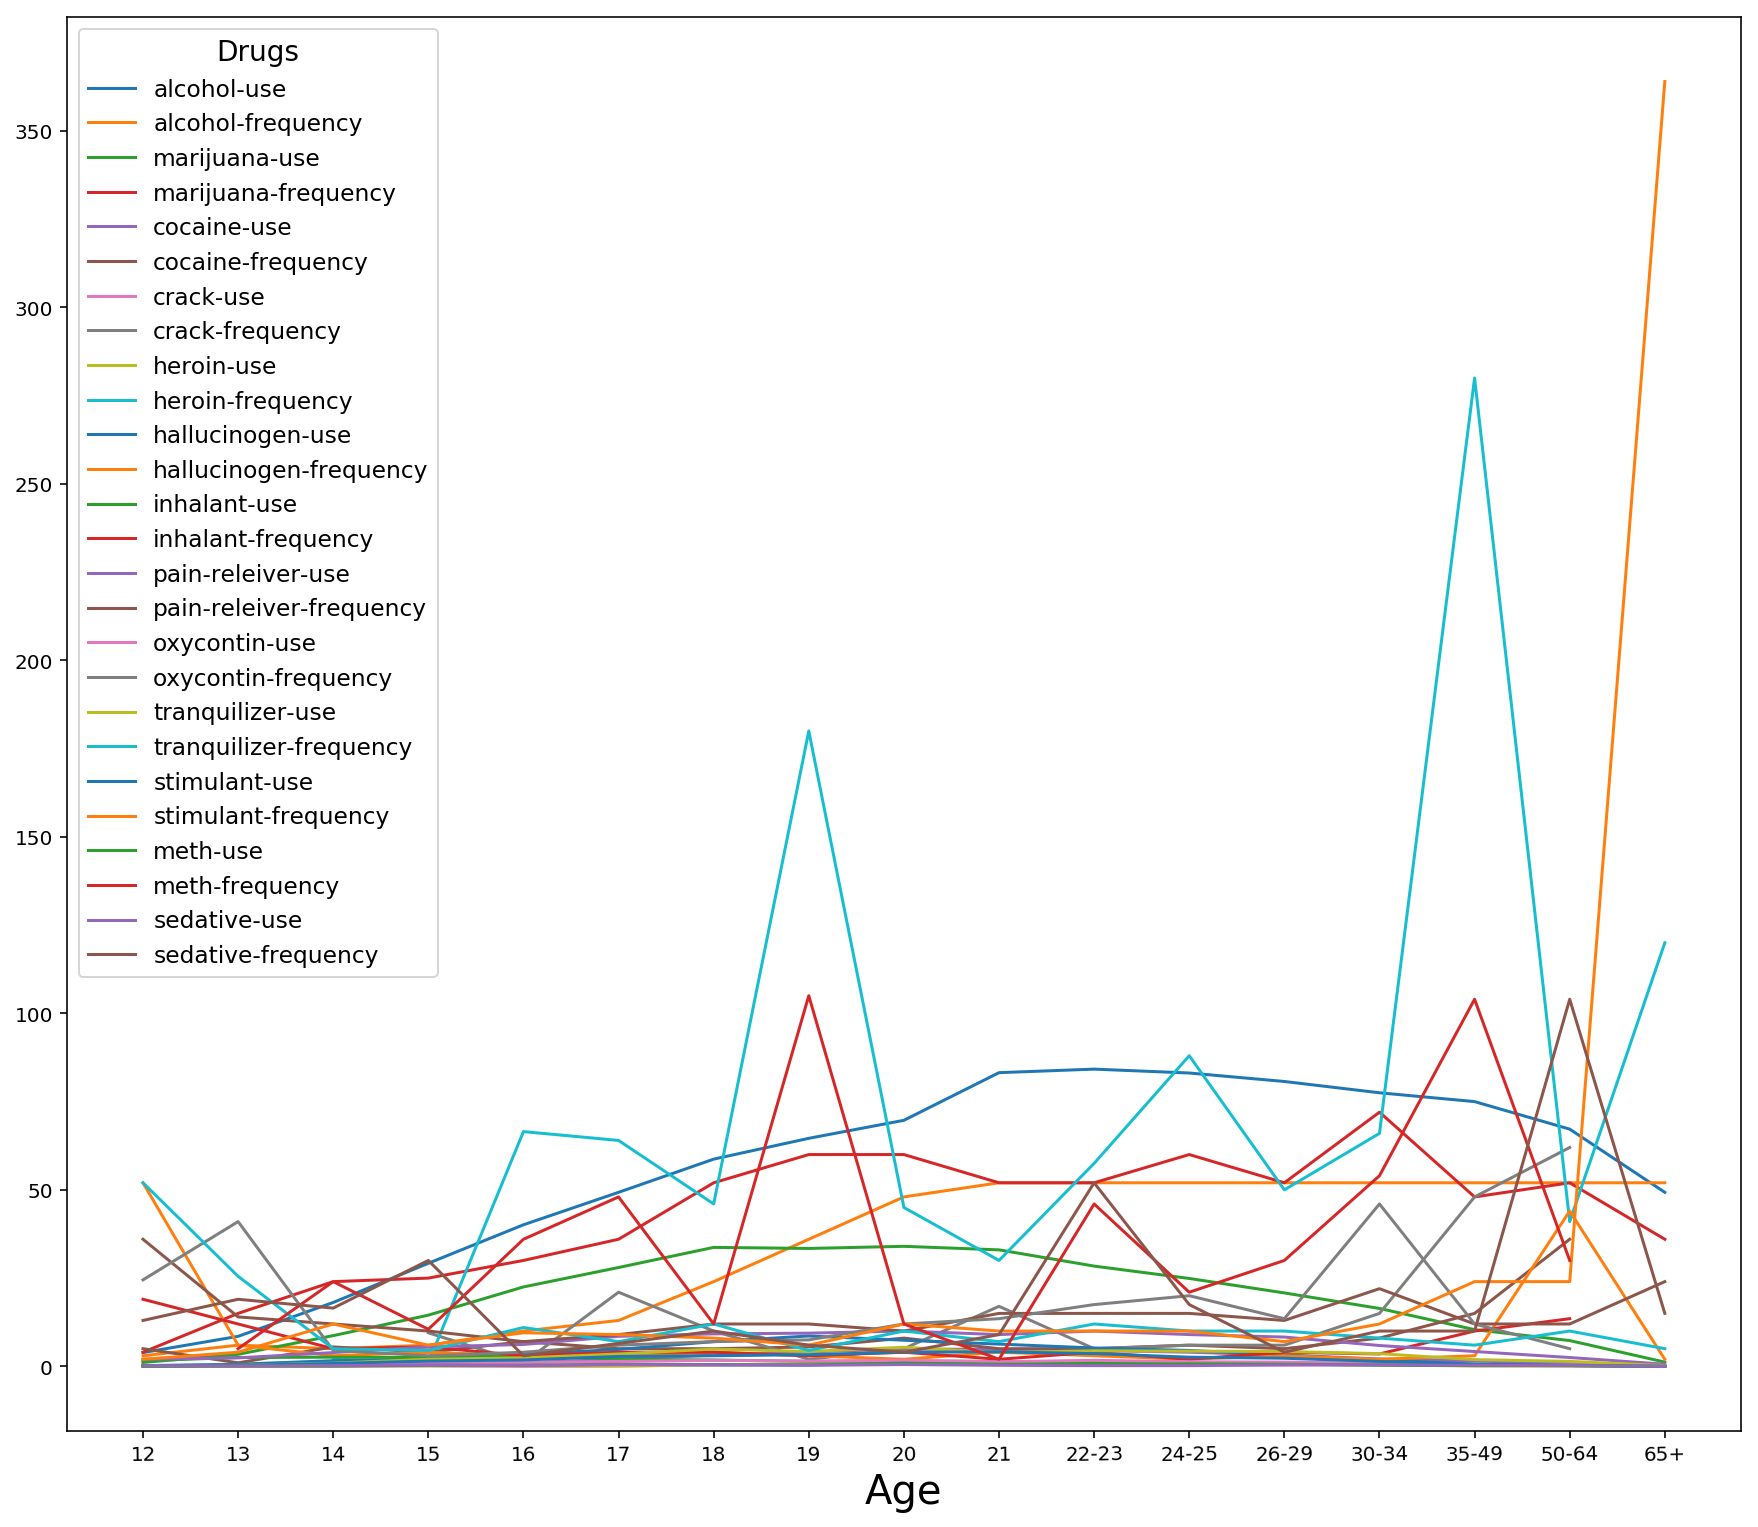

In [675]:
# column age and n are dropped since only drugs will be focused trend here. 
new_drug_df = drug_df.drop(['age','n'],axis=1)
new_drug_df.plot(figsize = (15,13), rot = 1, fontsize =10)
plt.legend(title='Drugs',fontsize='small',title_fontsize=14)
plt.xlabel('Age',fontsize=20)
plt.xticks(np.arange(0, len(drug_df)),drug_df['age'])

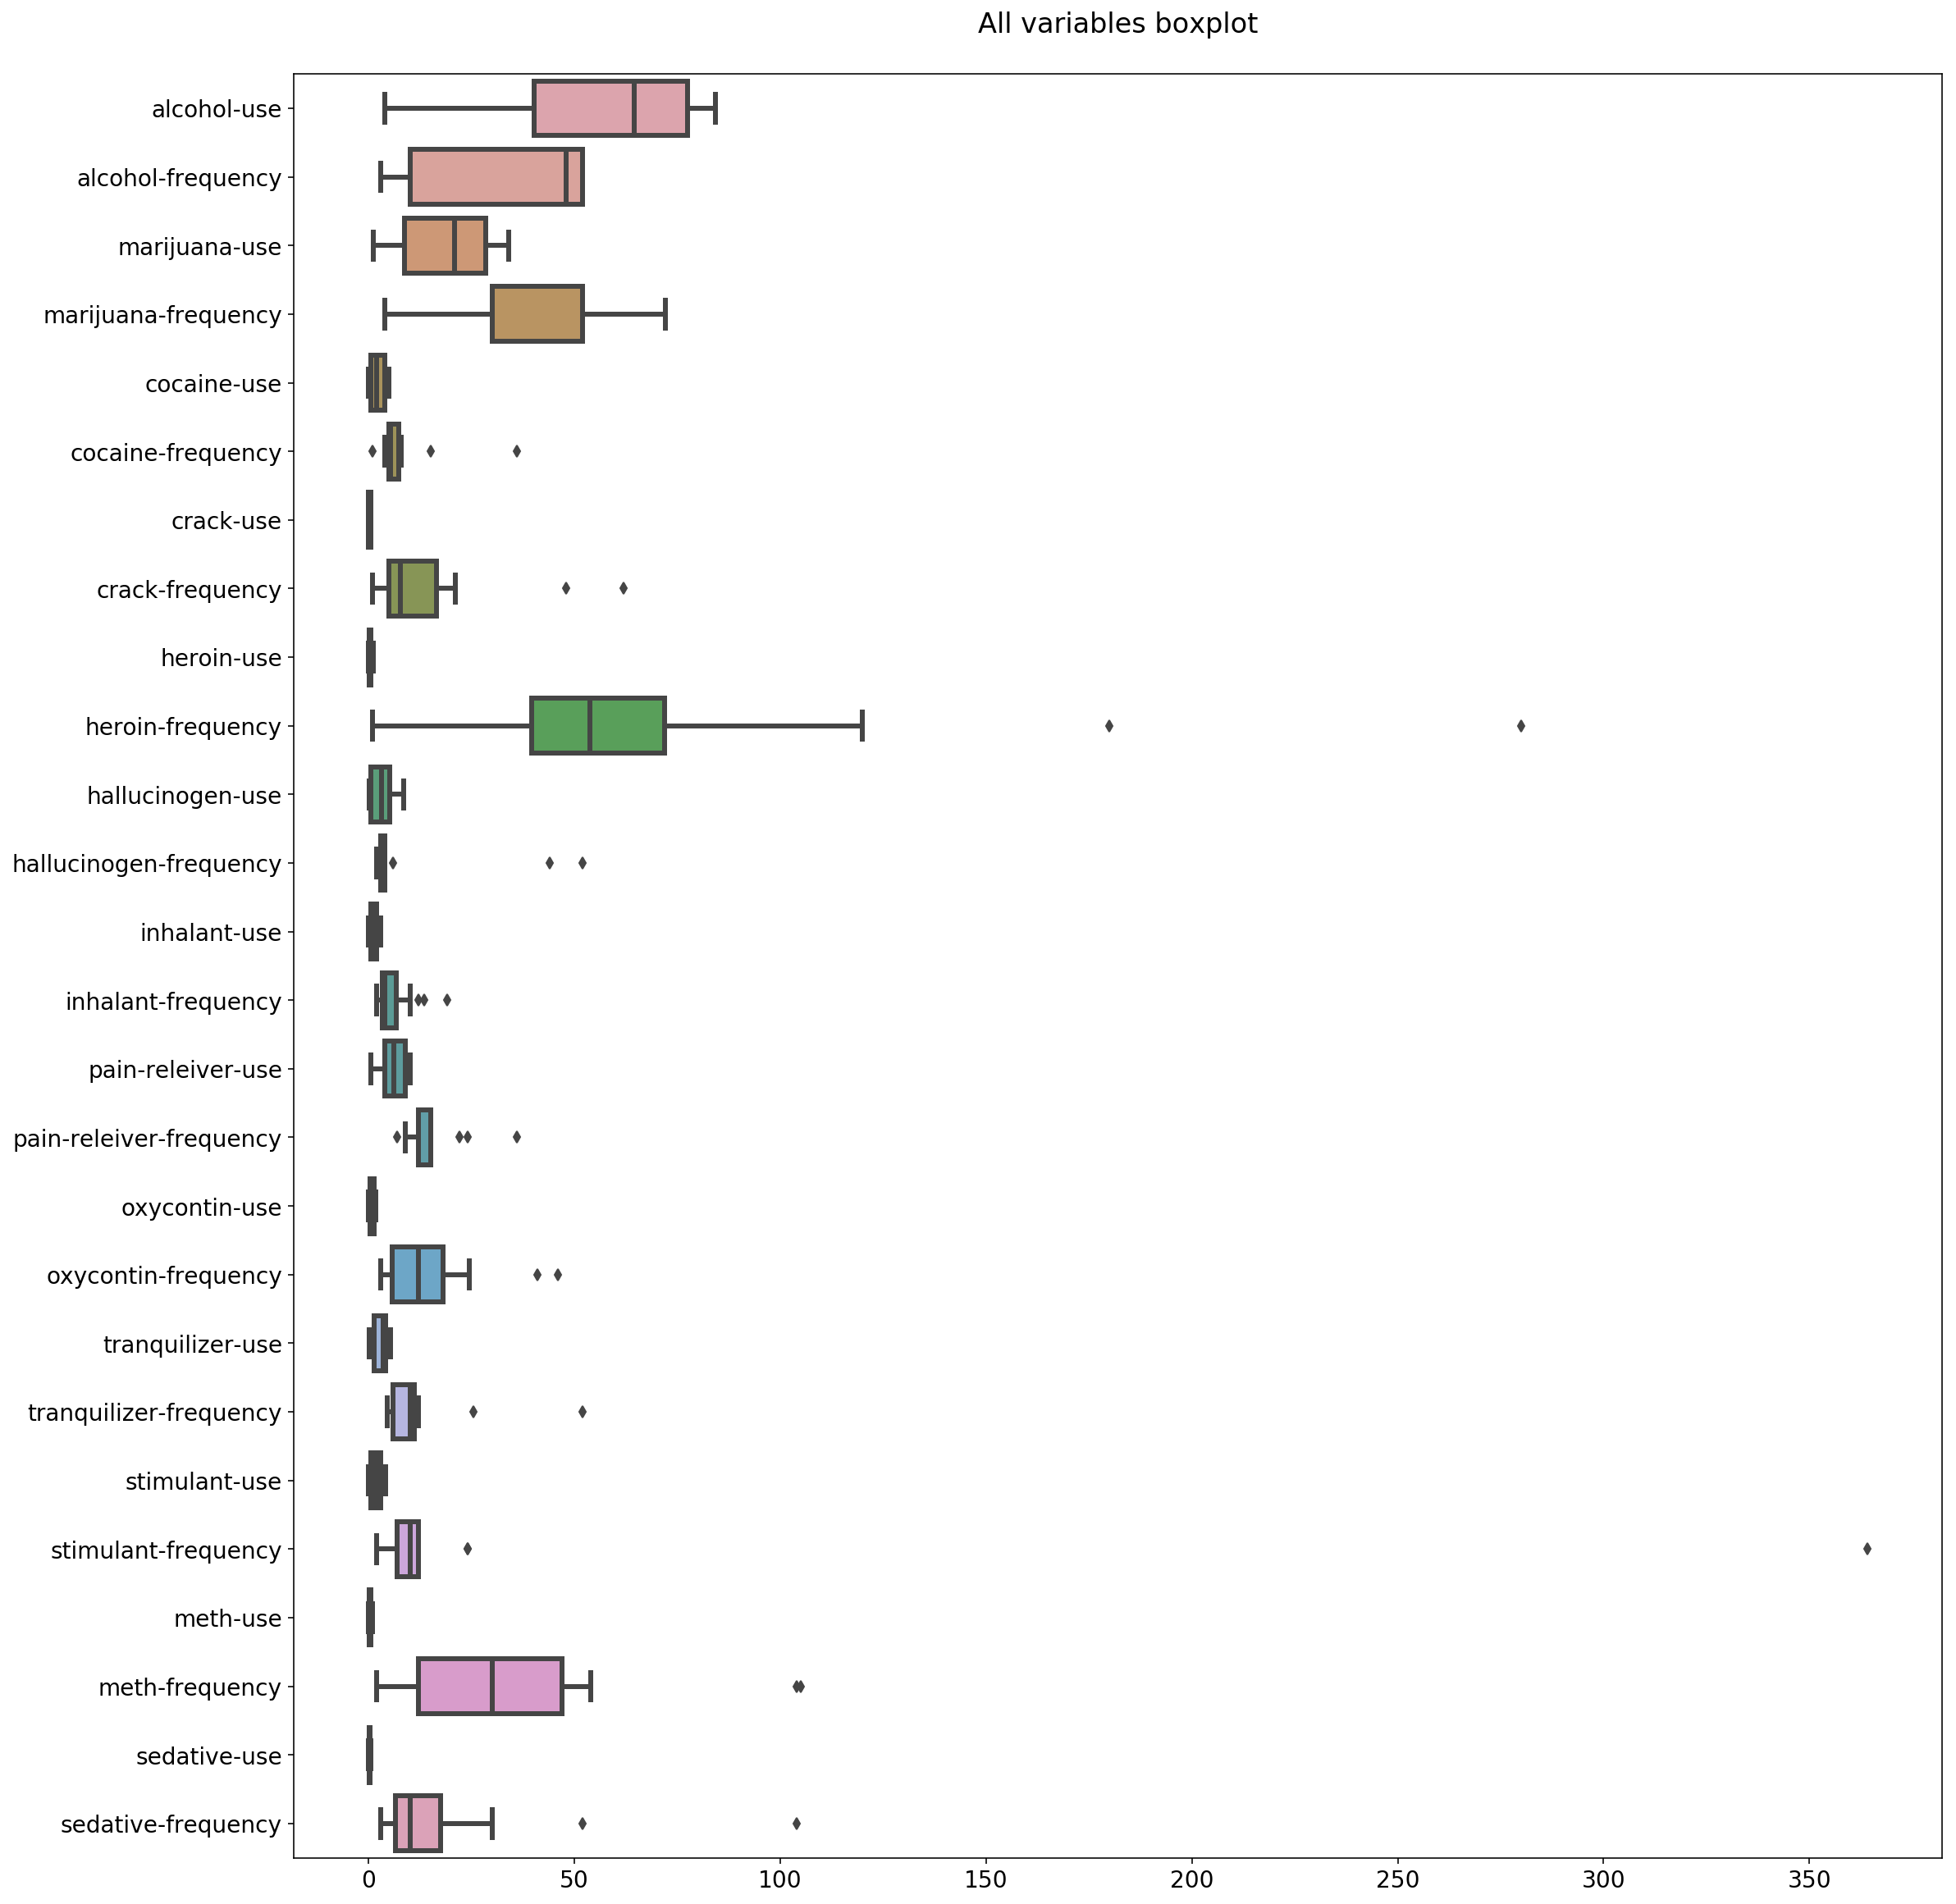

In [676]:
# new_drug_df is used whch column n is dropped since only drugs will be focused trend here. 
fig = plt.figure(figsize=(18,20))
ax = fig.gca()

ax = sns.boxplot(data=new_drug_df, orient='h', fliersize=5, linewidth=3, notch=False,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

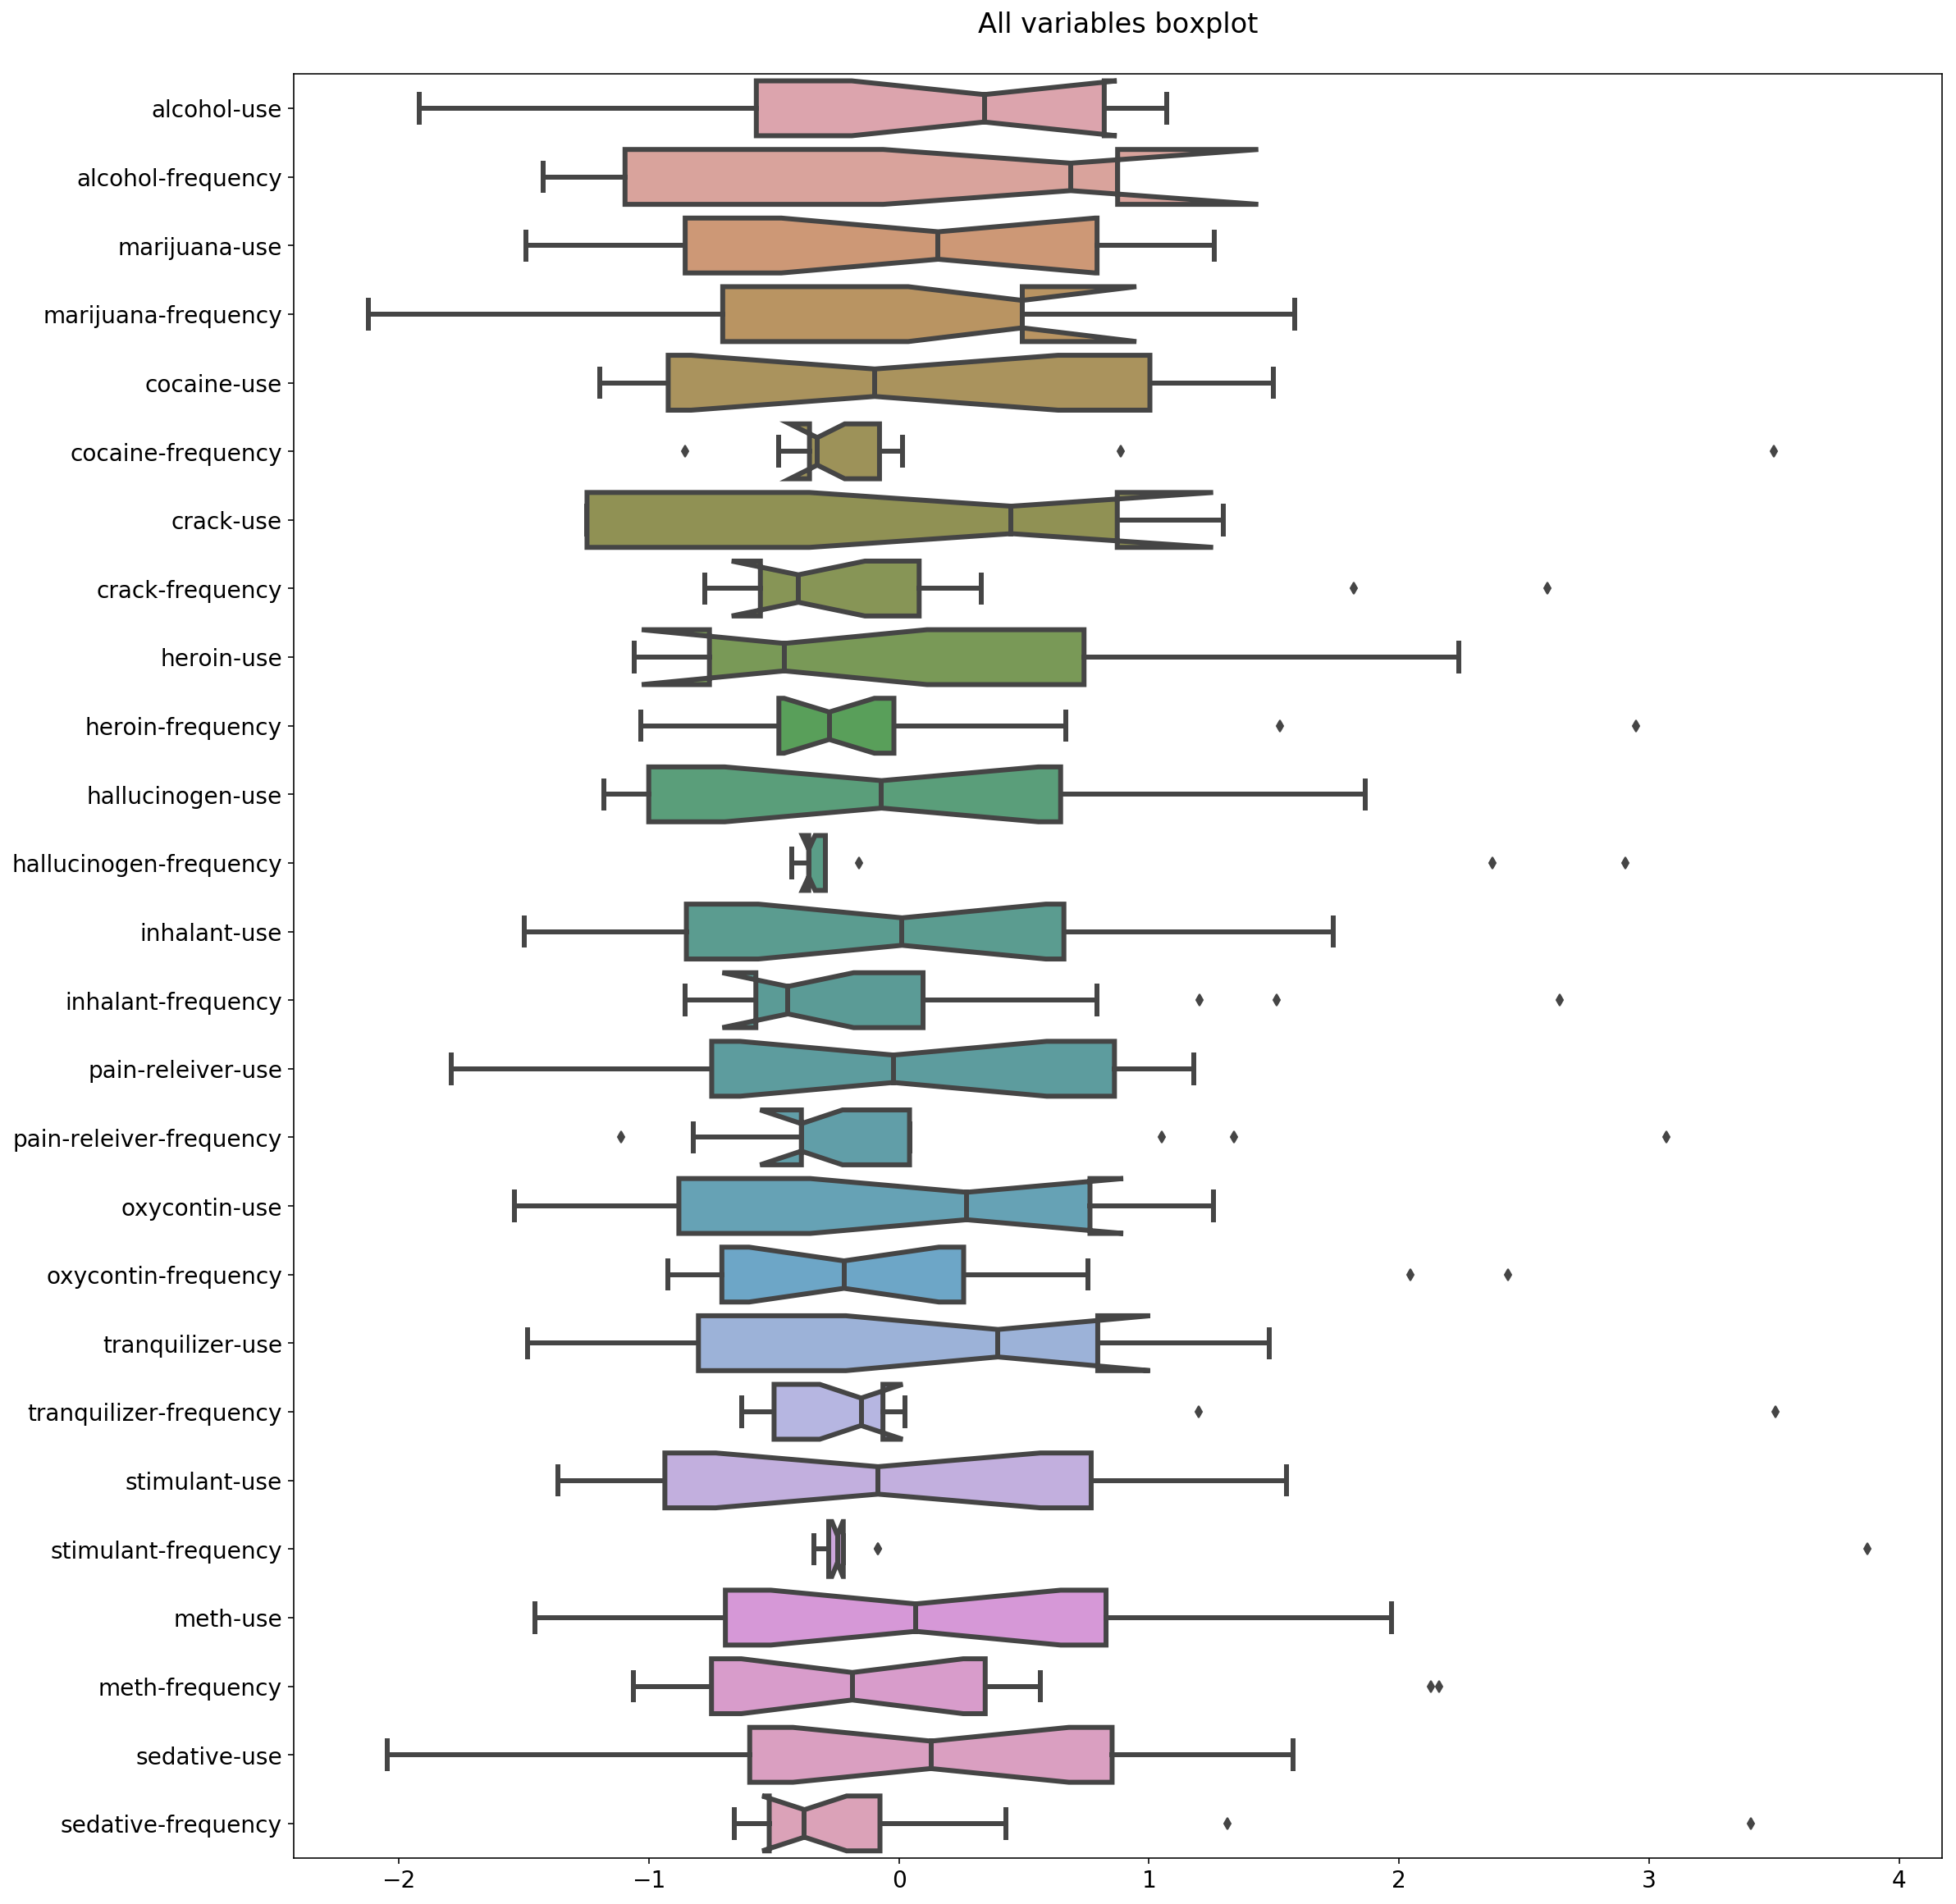

In [677]:
# Standardization is applied here to observe the data easier.
drug_df_stand = (new_drug_df - new_drug_df.mean()) / new_drug_df.std()
fig = plt.figure(figsize=(18,20))
ax = fig.gca()

ax = sns.boxplot(data=drug_df_stand, orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

In [678]:
drug_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [679]:
# Adding age_index column to do correlation with age. Original age column is text with age interval.
drug_with_new_column = drug_df
drug_with_new_column['age_index'] = np.arange(0, len(drug_df))
drug_with_new_column.corr()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age_index
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.365386,0.281797,0.548114,0.007798,...,-0.024438,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,0.485909,-0.119997,0.256701,0.381845
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.254042,0.877378,0.202732,0.677614,...,-0.052126,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.282820,0.318268,0.091251,0.778374
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.391981,0.785050,0.333935,0.546194,...,0.119852,0.448543,-0.415026,0.291766,0.260304,0.425153,0.253725,0.029867,0.201423,0.919025
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,-0.273950,0.620670,-0.476095,0.711613,...,-0.323519,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.014585,0.616766,-0.277144,0.021422
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.250348,0.892077,0.113860,0.631789,...,0.040880,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.317099,0.399124,0.048777,0.705031
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,-0.163922,0.835727,-0.339153,0.899944,...,-0.075193,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.043154,0.461914,-0.159997,0.267733
cocaine-frequency,0.365386,0.254042,0.391981,-0.273950,0.250348,-0.163922,1.000000,0.250877,0.875558,-0.206298,...,-0.236768,-0.191929,-0.144951,-0.345279,0.817772,-0.189141,0.172758,-0.126690,0.773808,0.591401
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,0.250877,1.000000,0.173208,0.750790,...,0.056195,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.281240,0.438421,0.091676,0.566947
crack-frequency,0.548114,0.202732,0.333935,-0.476095,0.113860,-0.339153,0.875558,0.173208,1.000000,-0.417148,...,-0.195650,-0.420309,-0.233501,-0.511014,0.903993,-0.395273,0.261224,-0.060603,0.611218,0.609361
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,-0.206298,0.750790,-0.417148,1.000000,...,0.039657,0.818583,-0.175464,0.808024,-0.277996,0.816620,-0.078088,0.333649,-0.023708,0.229914


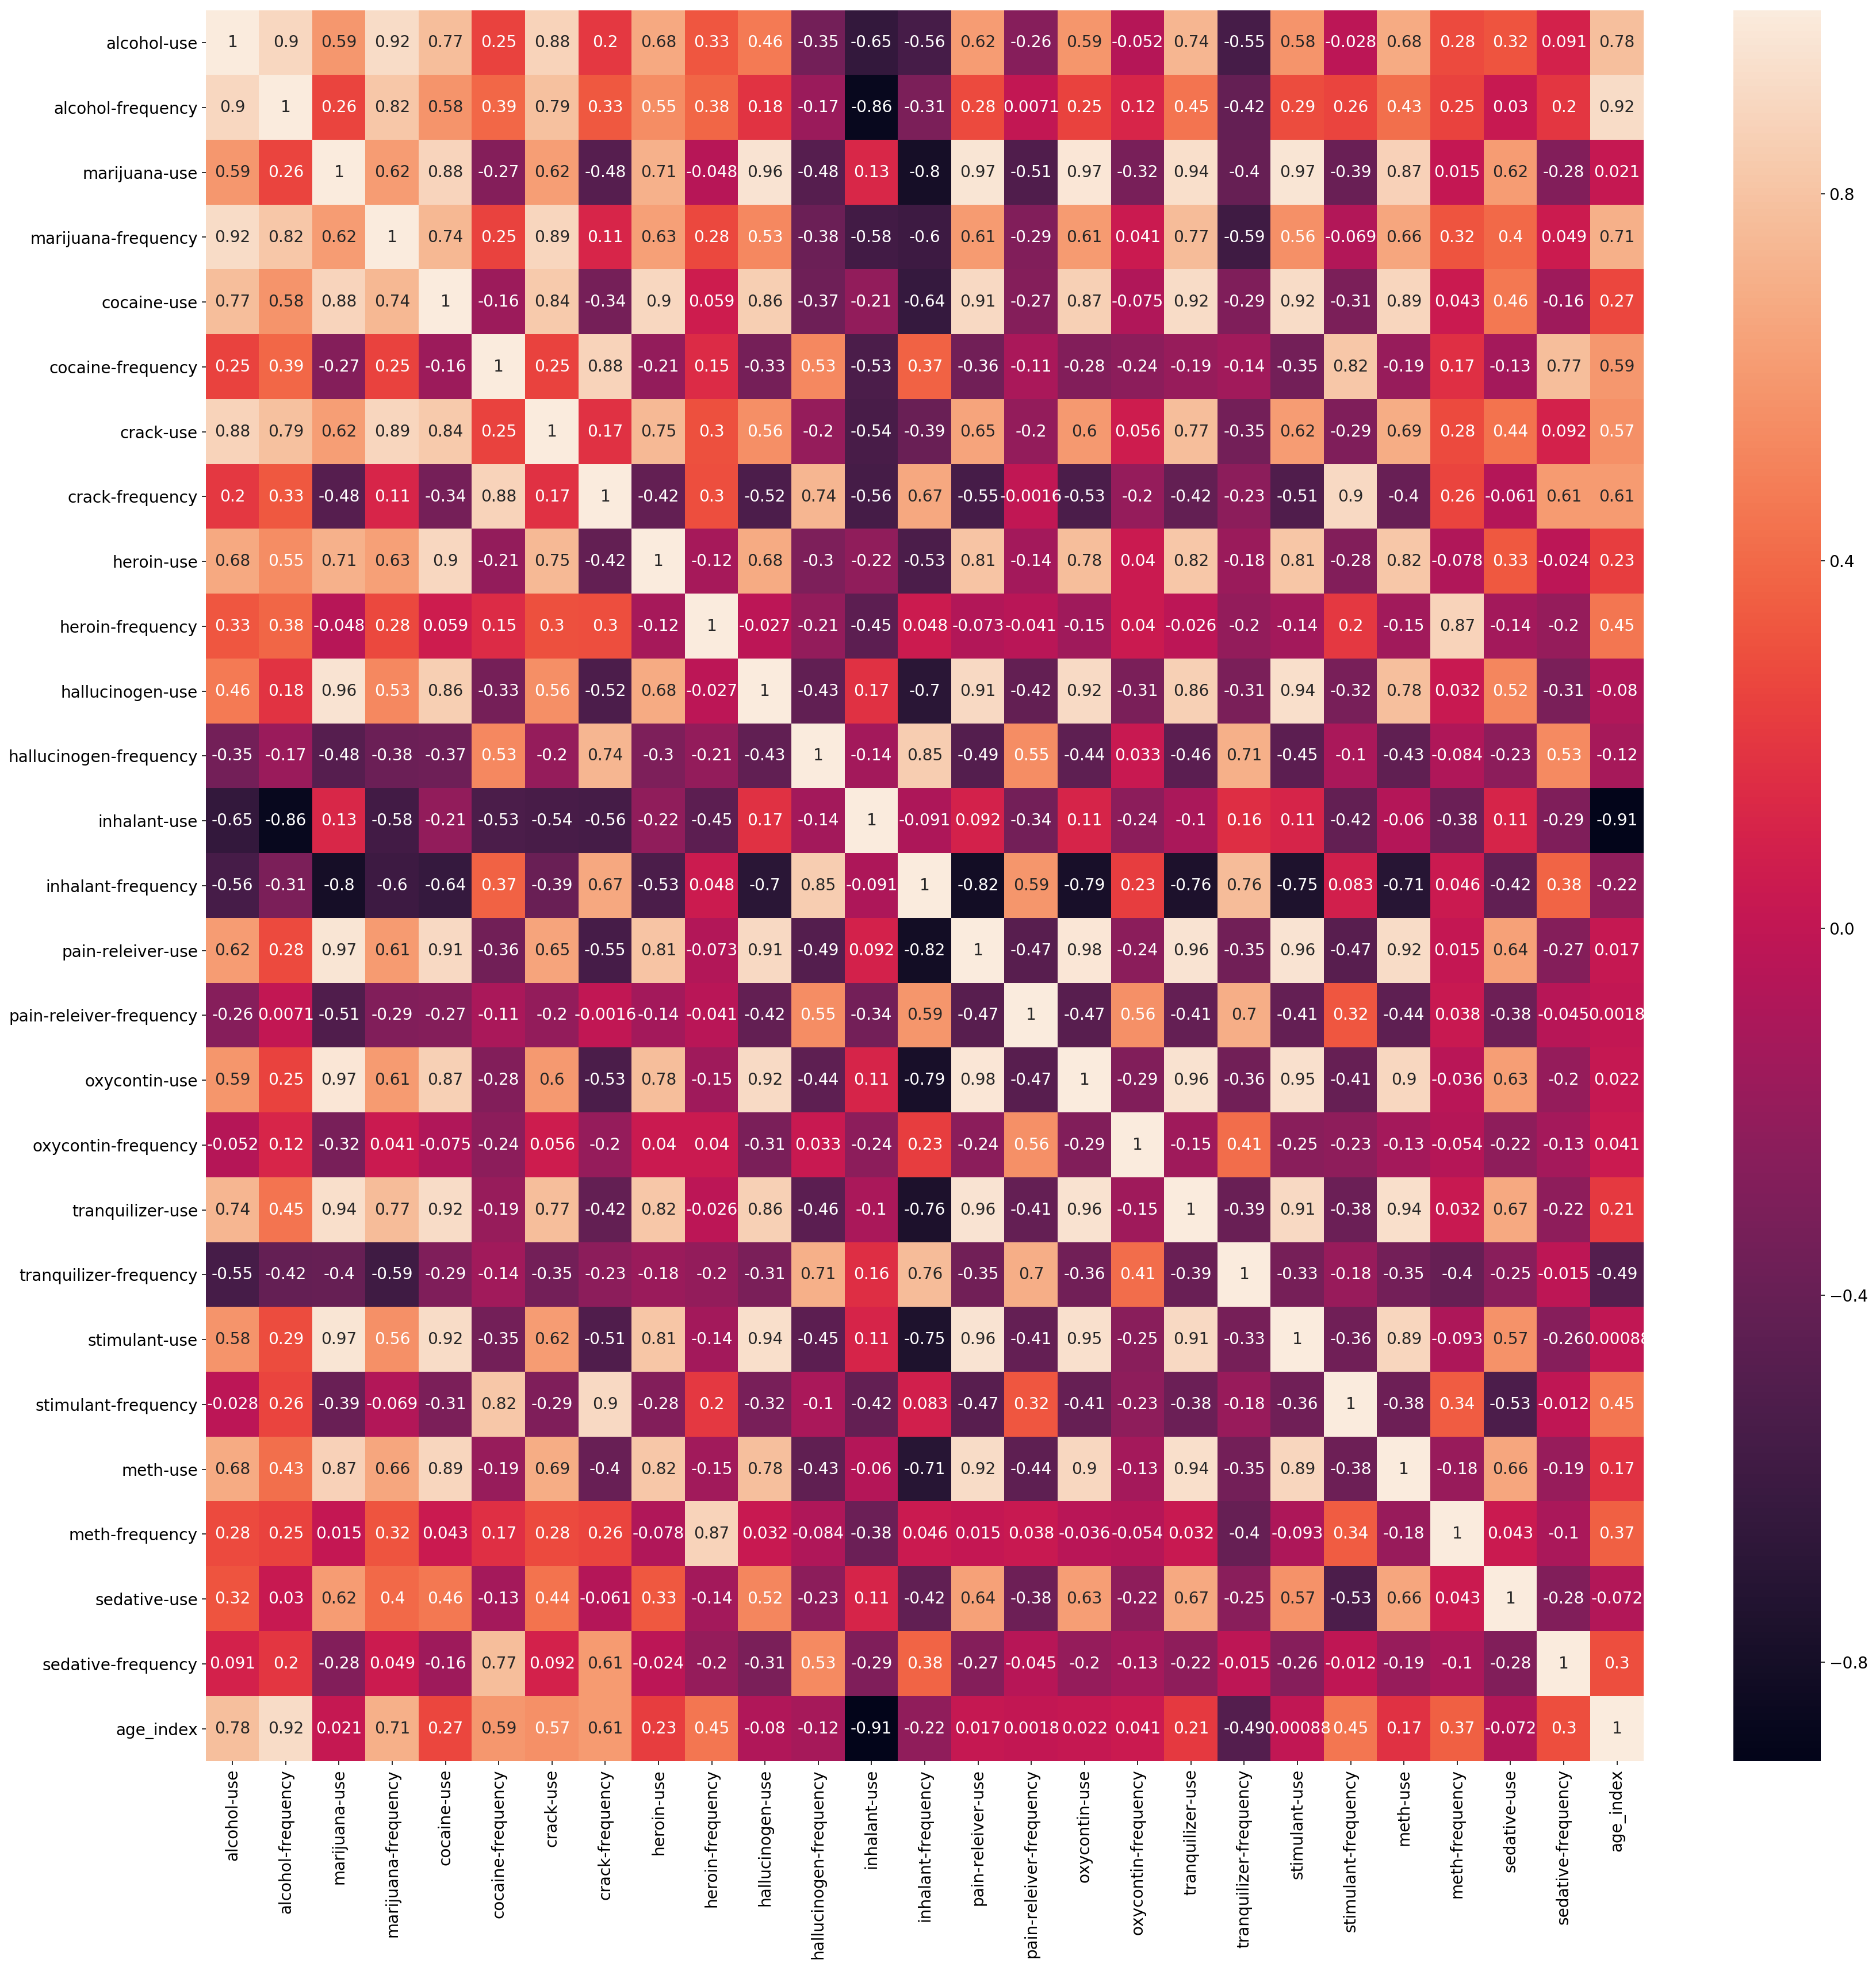

In [680]:
plt.figure(figsize=(28,28))
sns.heatmap(drug_with_new_column.drop(['n'],axis=1).corr(), annot=True)

/Users/nandar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/nandar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


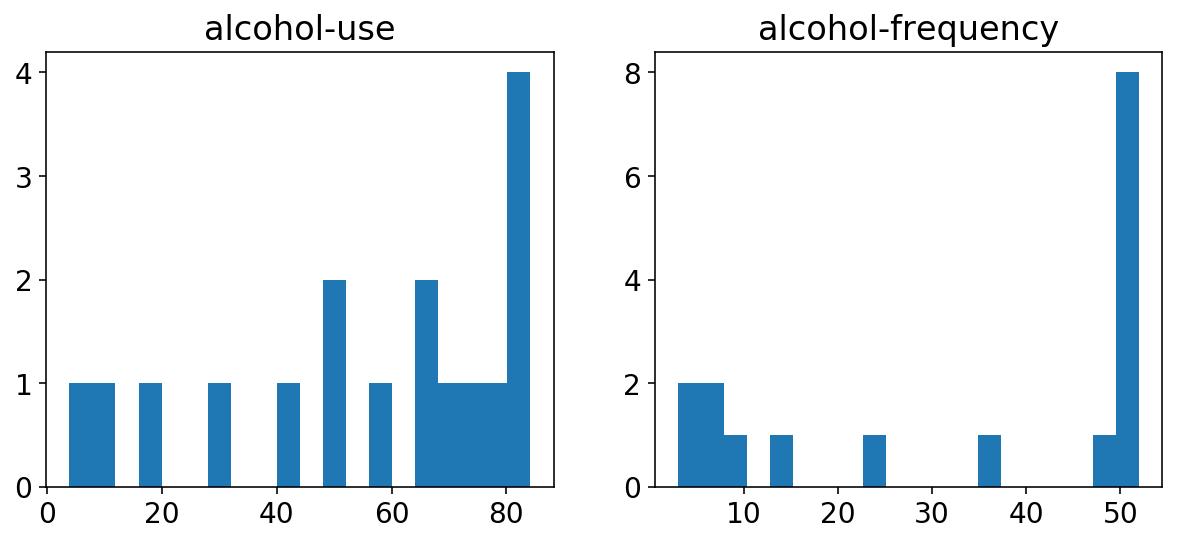

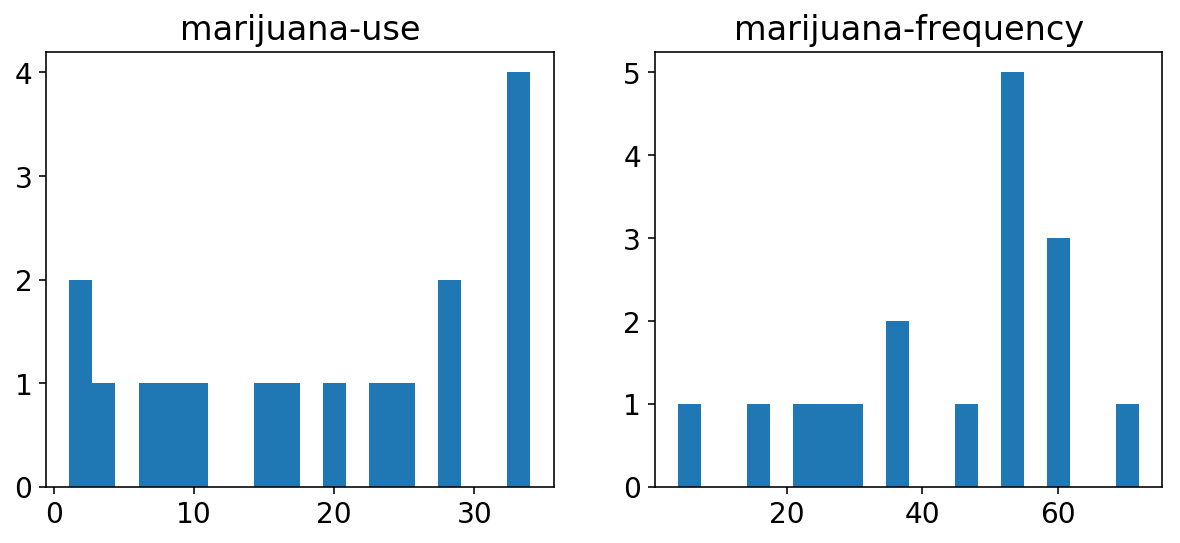

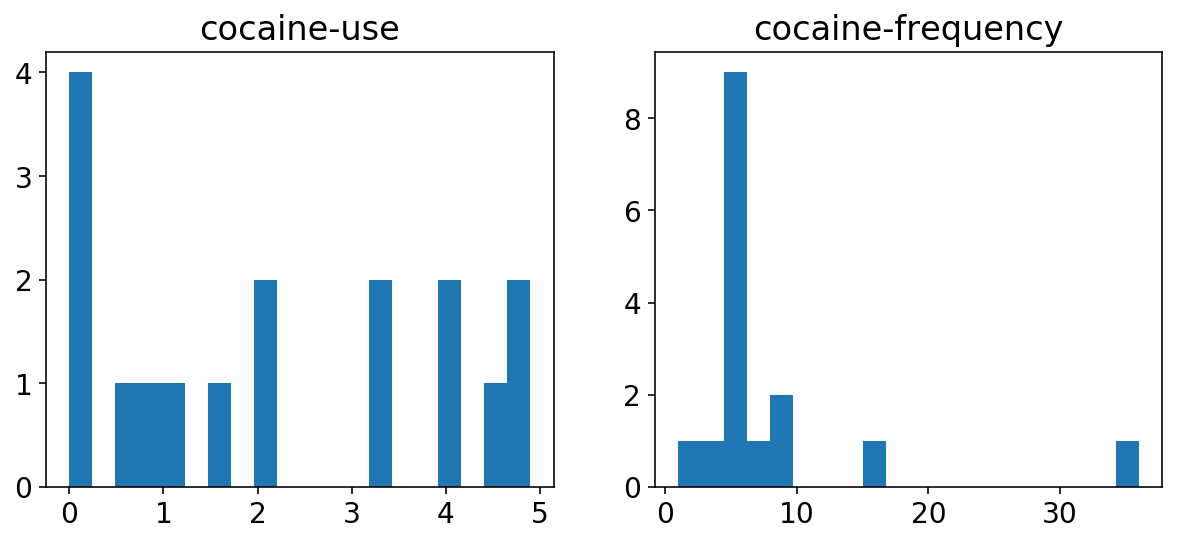

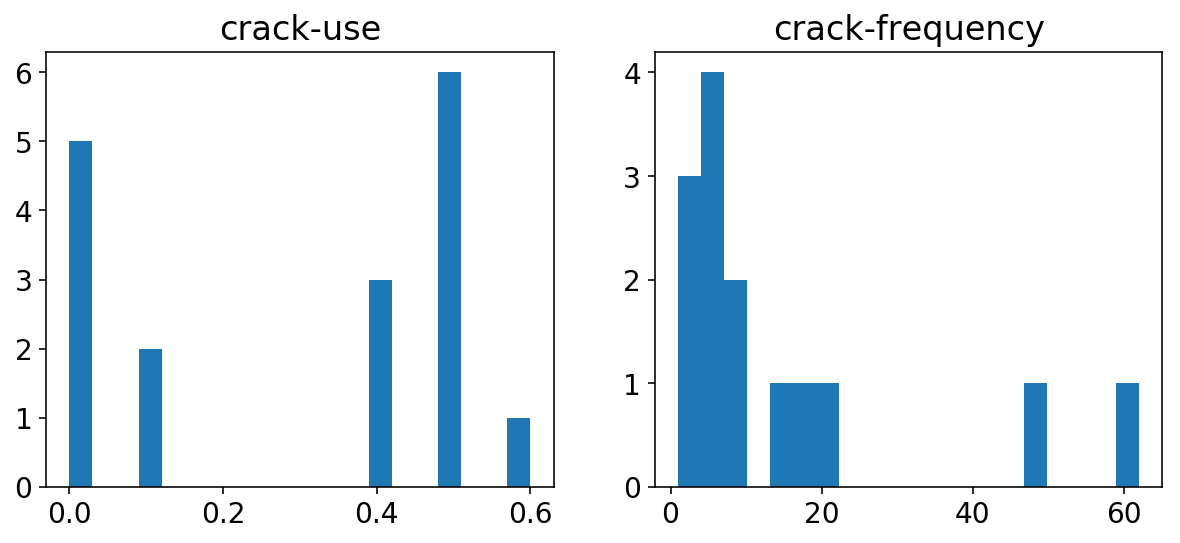

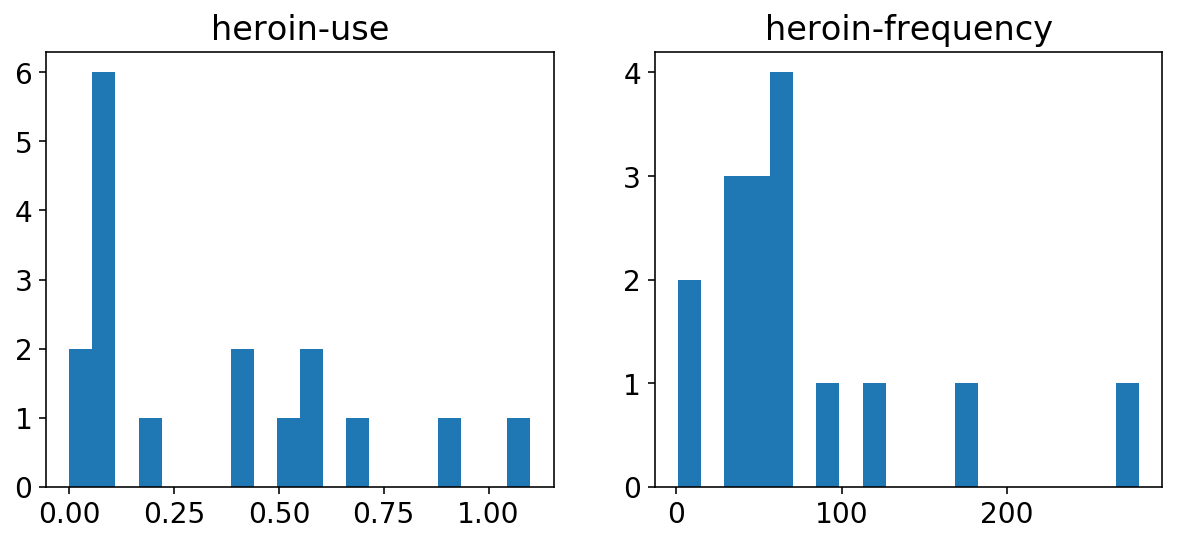

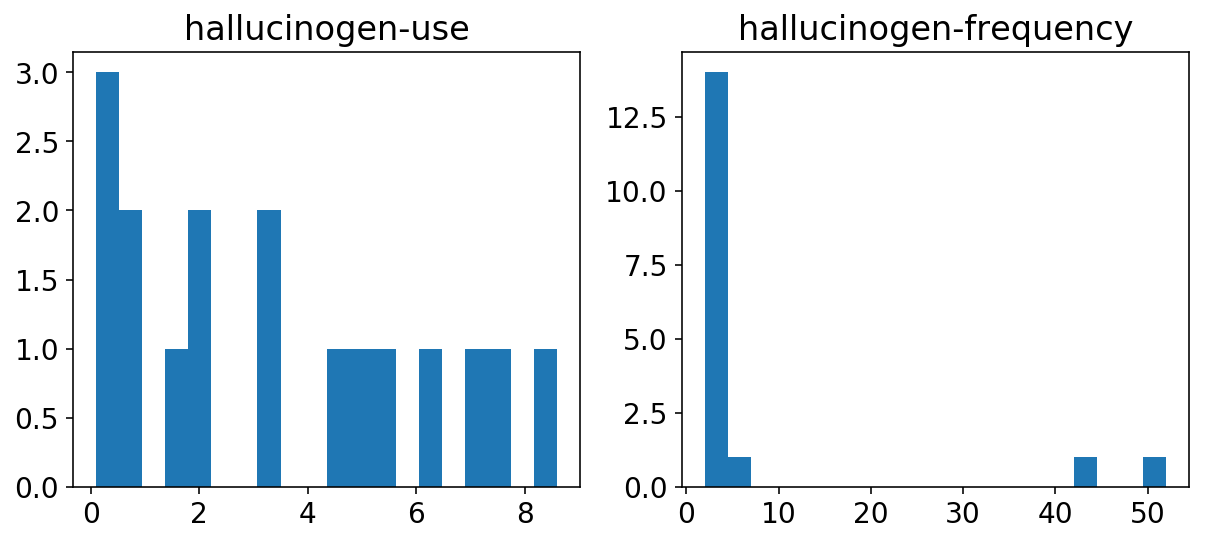

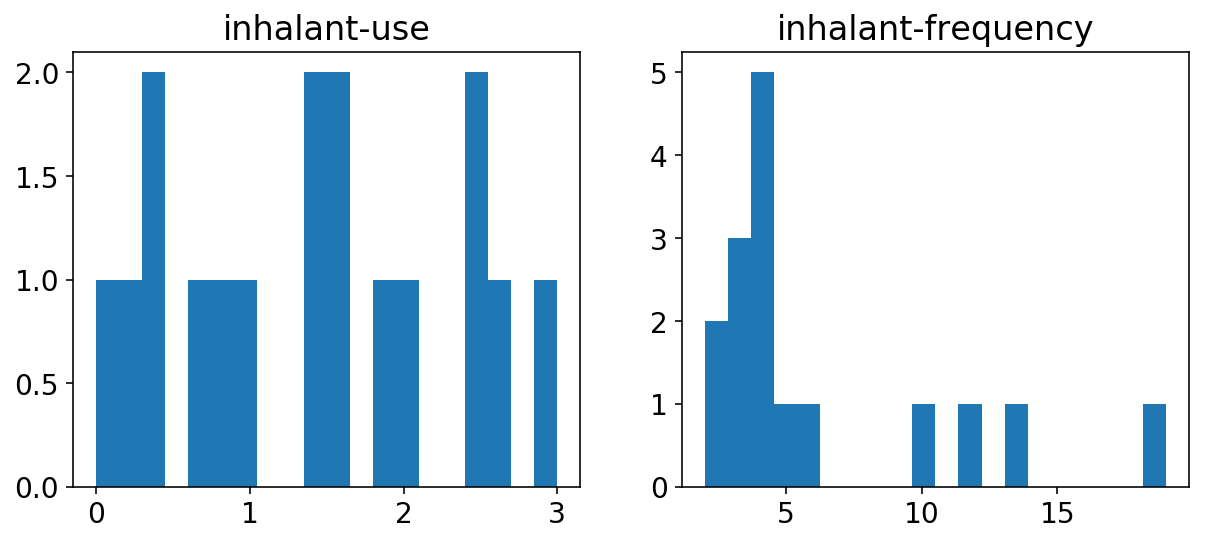

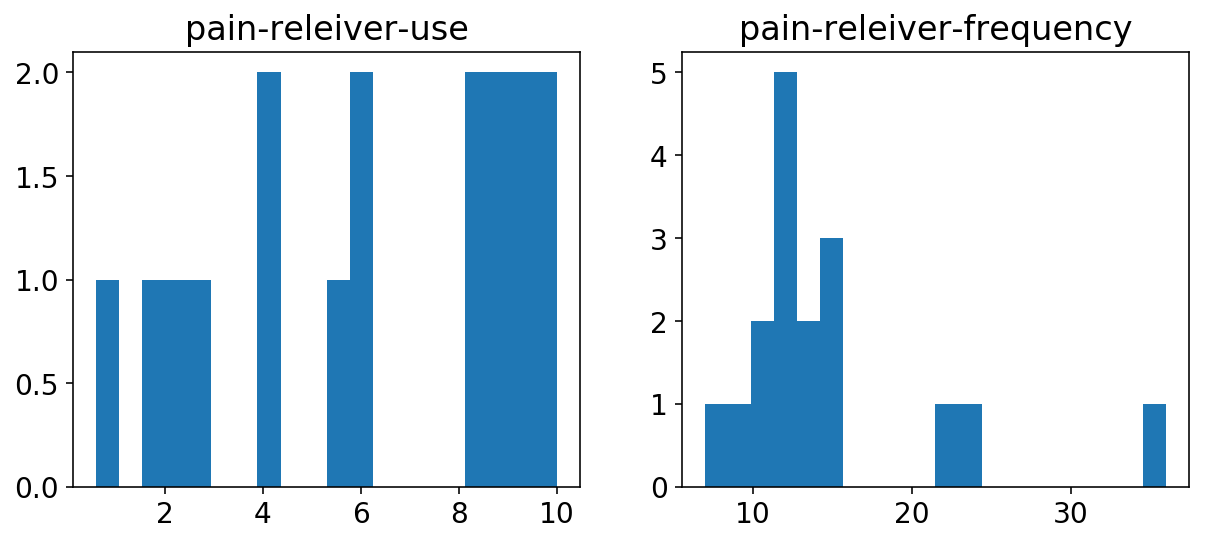

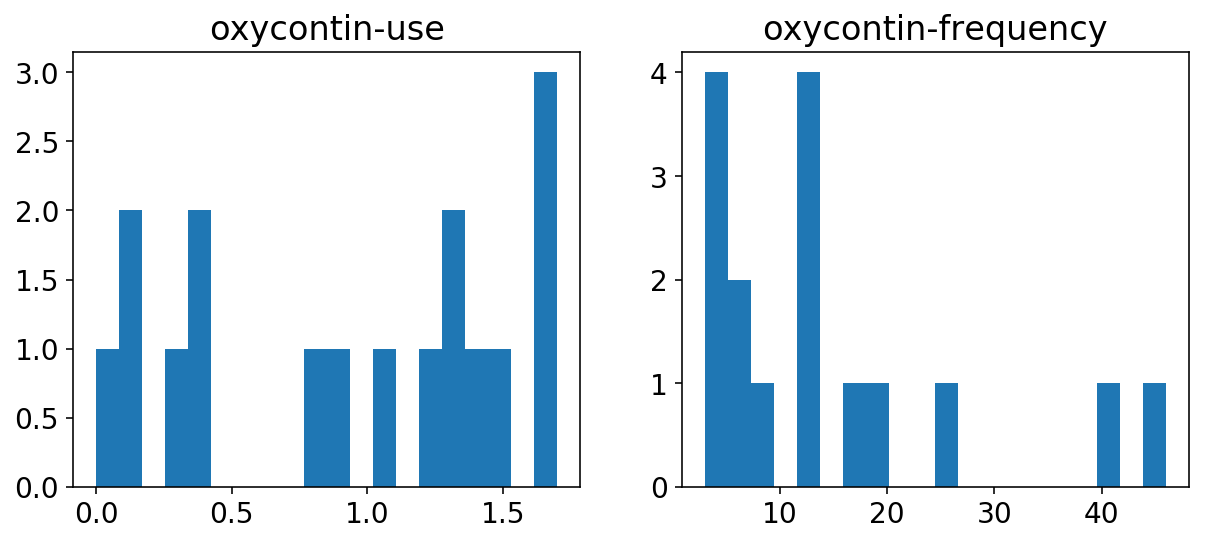

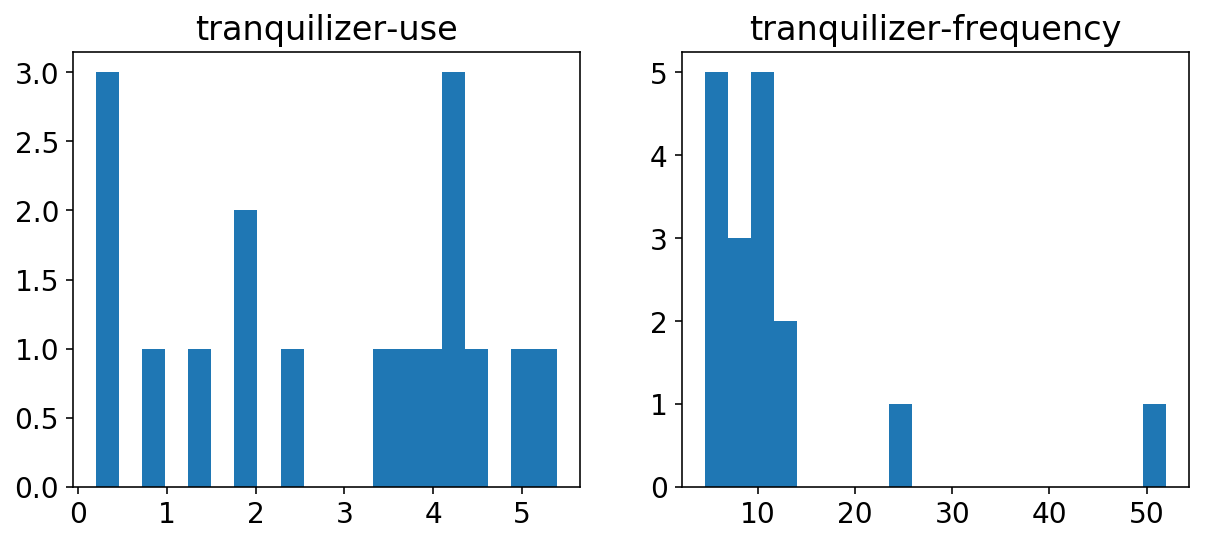

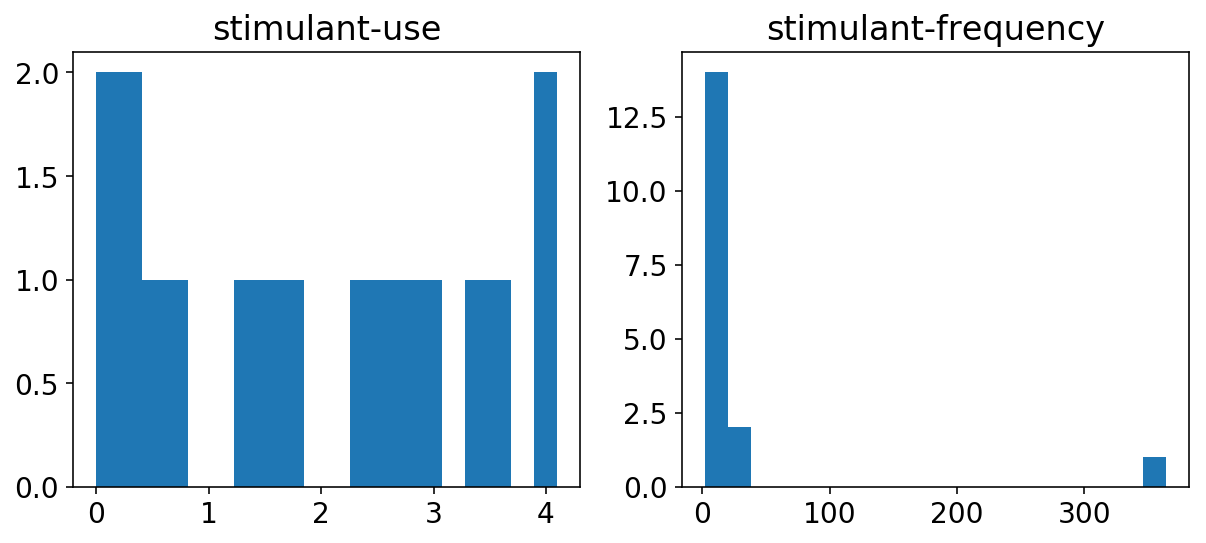

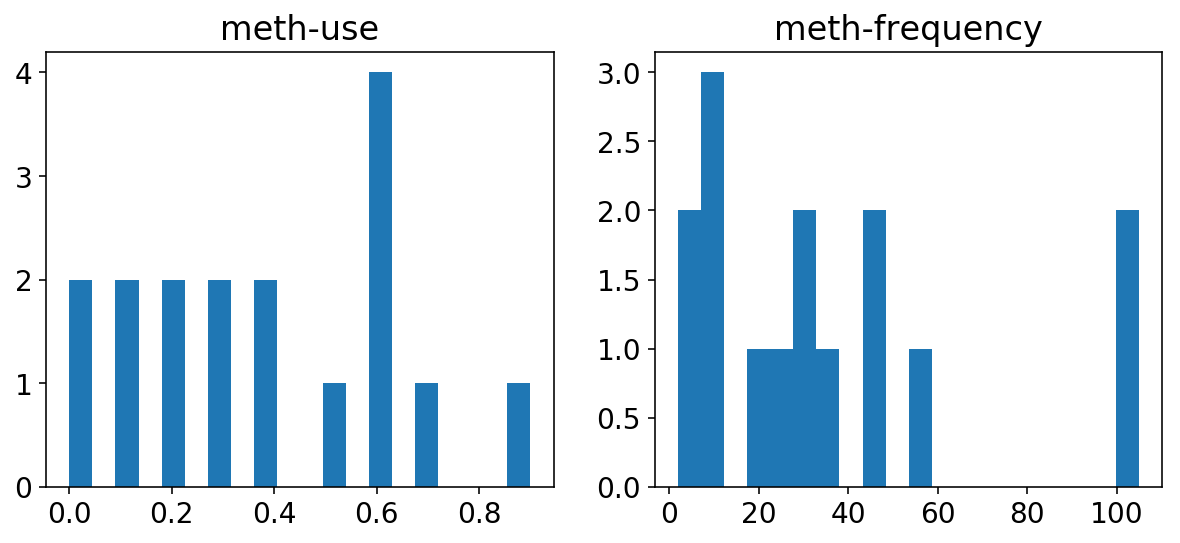

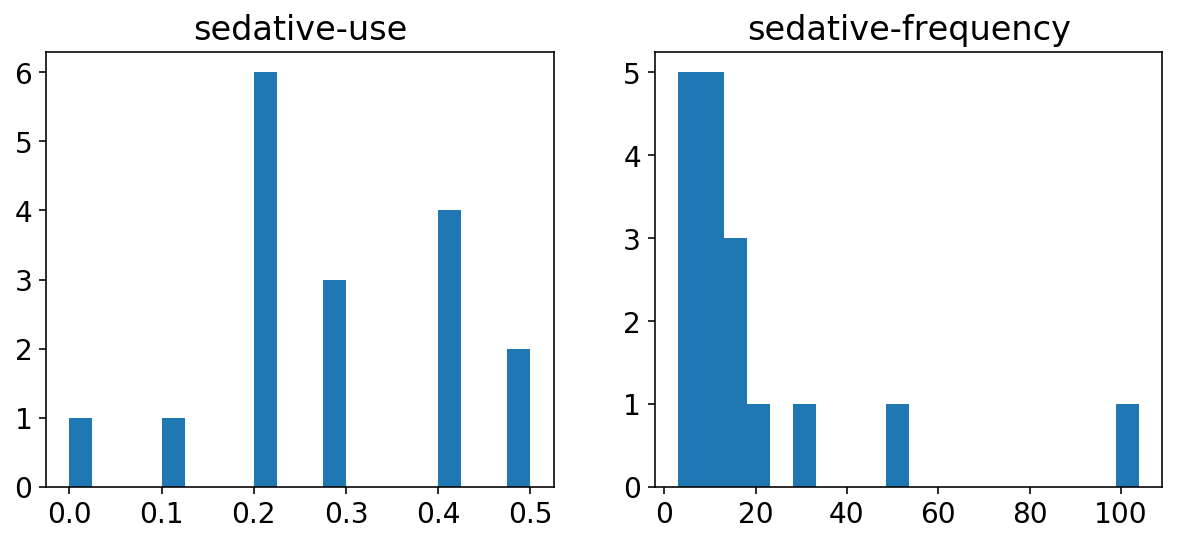

In [681]:
def hist_plotting(plot1,plot2,p1_title,p2_title):
    fig1, (ax1, ax2) = plt.subplots(1, 2,figsize = (10,4)) # one row, two columns

    ax1.hist(plot1, bins = 20)
    ax1.set_title(p1_title)

    ax2.hist(plot2, bins = 20)
    ax2.set_title(p2_title)
for index,value in enumerate(drug_df.columns):
    if value not in ["age","n"] and index%2 == 0 and index < len(drug_df.columns)-1:
        hist_plotting(drug_df[drug_df.columns[index]],drug_df[drug_df.columns[index+1]],\
                      drug_df.columns[index],drug_df.columns[index+1])


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

Mean Diff. between Meth and Sedative use : 0.09999999999999998

Correlation between Meth and Sedative use : [[1.        0.6630787]
 [0.6630787 1.       ]]

t-value : 1.3892023389572417, p-value : 0.17436343527752096
Meth: 
mean: 0.38235294117647056
std: 0.25491704329435827
Meth Standardization: 
mean: 6.530723674265627e-17
std: 0.9999999999999999
Sedative: 
mean: 0.38235294117647056
std: 0.25491704329435827
Sedative Standardization: 
mean: -3.657205257588751e-16
std: 1.0


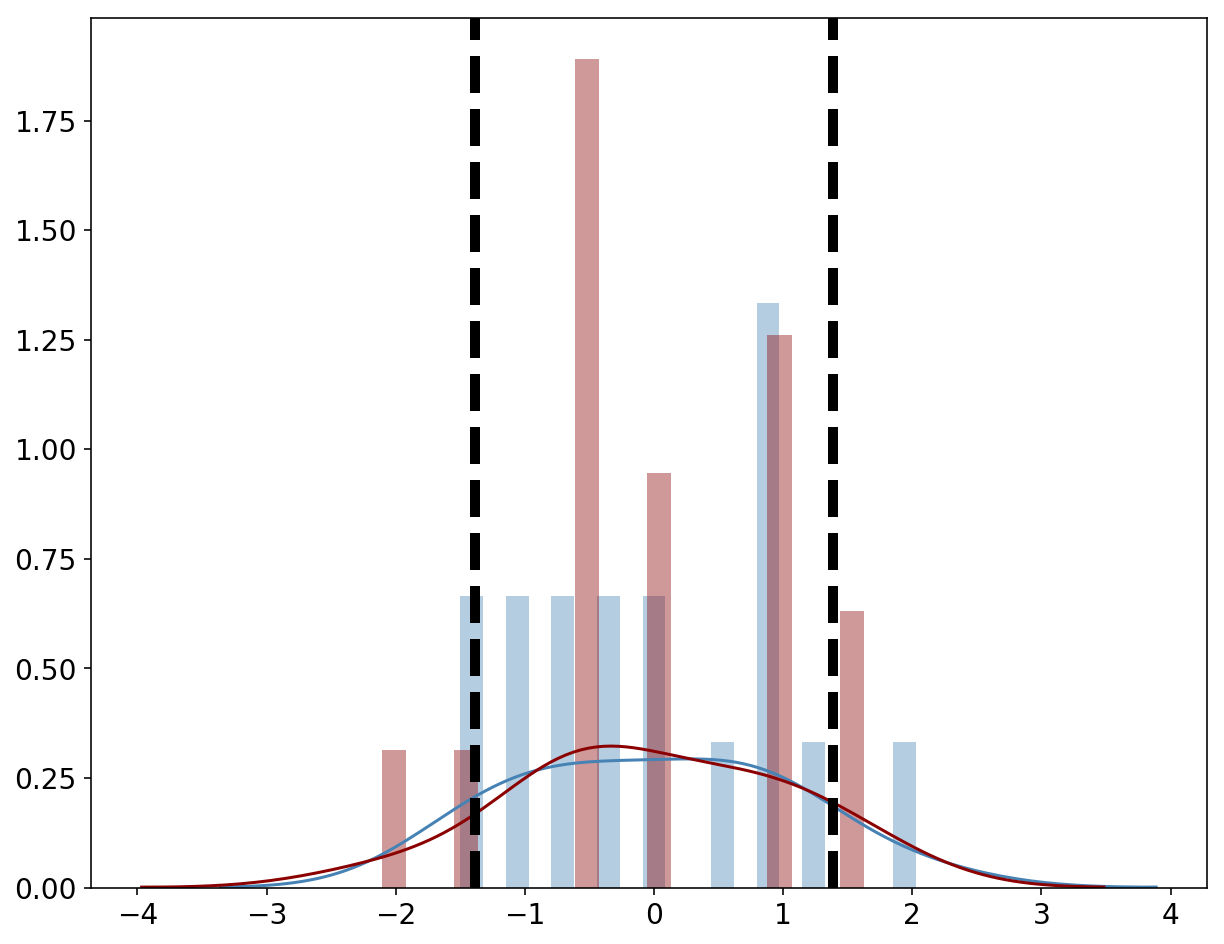

In [682]:
# Code
import scipy.stats as stats

print("Mean Diff. between Meth and Sedative use : {}\n" \
      .format(np.mean(drug_df['meth-use'])-np.mean(drug_df['sedative-use'])))
print("Correlation between Meth and Sedative use : {}\n" \
      .format(np.corrcoef(drug_df['meth-use'],drug_df['sedative-use'])))

t_stat, p_value = stats.ttest_ind(drug_df['meth-use'], drug_df['sedative-use'])
print("t-value : {}, p-value : {}".format(t_stat,p_value))

meth = drug_df['meth-use'].values
meth_mean = np.mean(meth)
meth_std = np.std(meth)
print('Meth: \nmean: {}'.format(meth_mean))
print('std: {}'.format(meth_std))

meth_stand = (meth - meth_mean) / meth_std
print('Meth Standardization: \nmean: {}'.format(np.mean(meth_stand)))
print('std: {}'.format(np.std(meth_stand)))

sedative = drug_df['sedative-use'].values
sedative_mean = np.mean(sedative)
sedative_std = np.std(sedative)
print('Sedative: \nmean: {}'.format(meth_mean))
print('std: {}'.format(meth_std))

sedative_stand = (sedative - sedative_mean) / sedative_std
print('Sedative Standardization: \nmean: {}'.format(np.mean(sedative_stand)))
print('std: {}'.format(np.std(sedative_stand)))

fig = plt.figure(figsize=(10,8))
ax = fig.gca()

# Standardized variables are used to observe the distribution of the variable easier.
ax = sns.distplot(meth_stand, label="Meth", bins=20, color='steelblue', ax=ax)
sns.distplot(sedative_stand, label="Sedative", bins=20, color='darkred', ax=ax)
ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5)
plt.show()

**Report**

1. Is Meth used more than sedative?
2. For T-test, 
   - Null Hypothesis, H0 : Meth use >= Sedative use
   - Alternative Hypothesis, H1 : Meth use < Sedative use
   - Sample size is 17. (Age is grouped in total 17 groups.)
   - After testing my hypethesis, based on p-value and confidance level we can tell if we can reject the statement that    meth is used more than sedative or not.
3. The distributions of each drug on the same plot using histograms as in above code and plot. Their both data distribution/spreading are not much different.  Mean different is not much and it is positively correlated between these two datasets.
4. The confidence level that i considered in this case is 95%. Hence, level of significance is 0.05.
   After calculation is done in python as above, pvalue is 0.174 which is greater than 0.05.
   Therefore, we do not reject H0 (the statement that meth is used more than sedative). 

...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

### Solution 8.1

In [683]:
new_scores_df = scores_df.drop(['Rate','Verbal-Math'],axis=1,inplace=False) # As shown in Q4.2
new_scores_df

,State,Verbal,Math
22,HI,485,515
24,CA,498,517
2,NJ,499,513
34,IL,576,589
45,WI,584,596
37,MI,561,572
4,NY,495,505
48,IA,593,603
38,MN,580,589
52,All,506,514


### Solution 8.2

### Plotting with Matplotlib with default method/setting to determine the outliers (1.5IQR)

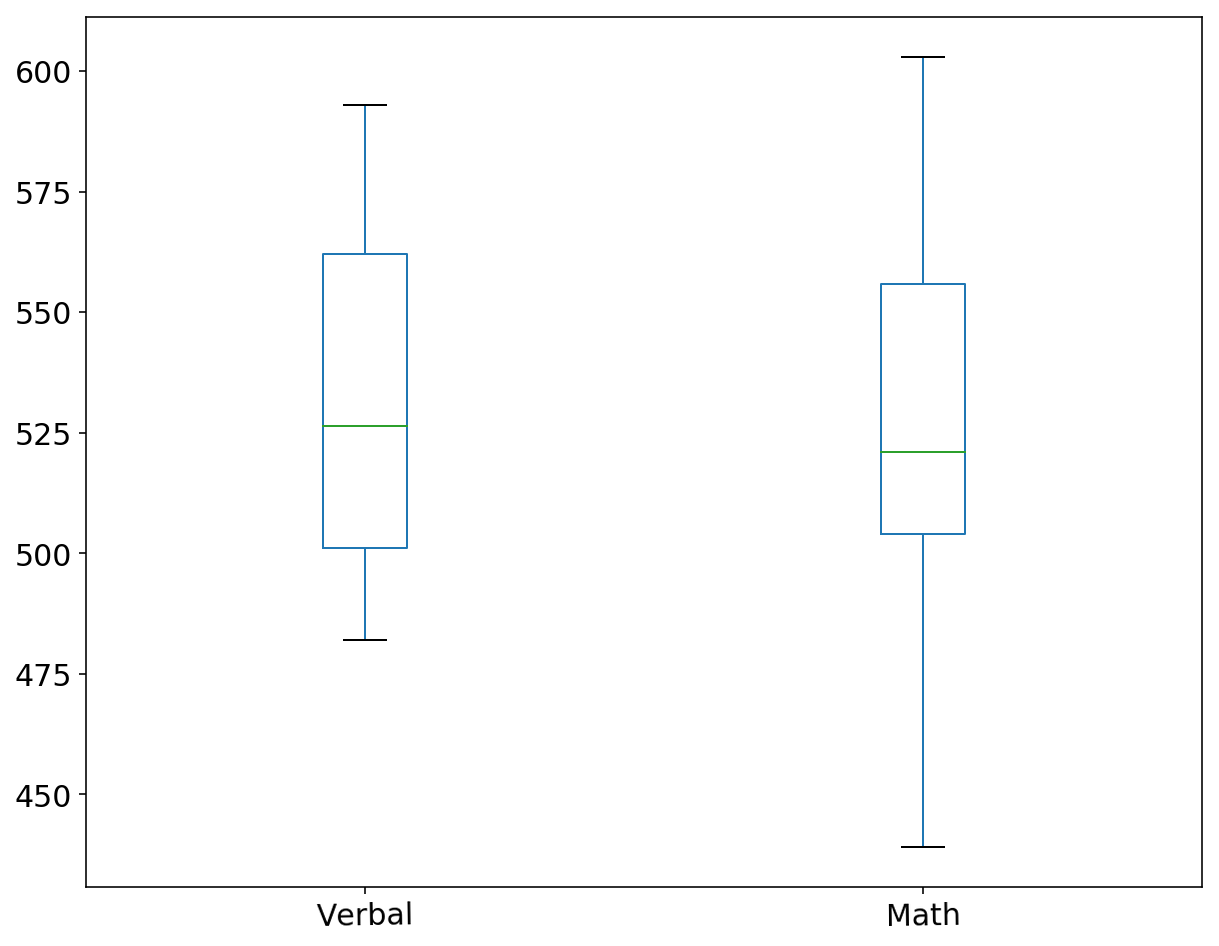

In [684]:
new_scores_df.plot(kind = 'box', figsize = (10,8), rot = 1, fontsize = 15)

In [685]:
new_scores_df['Verbal'].describe()

count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%      501.000000
50%      526.500000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64

In [686]:
stats.iqr(new_scores_df['Verbal'])

61.0

In [687]:
stats.iqr(new_scores_df['Math'])

51.75

### Answer :
- There is no outliers in the datasets with 1.5IQR for boundries in boxplot which means Q3+1.5IQR as upper boundary (max = 592) and Q3-1.5IQR as lower bounary (min = 482)

### Solution 8.3

#### Plotting with Matplotlib with 5 percentile and 95 percentile to determine the outliers (not 1.5IQR)

Text(0.5, 1.0, 'SAT Score Boxplot')

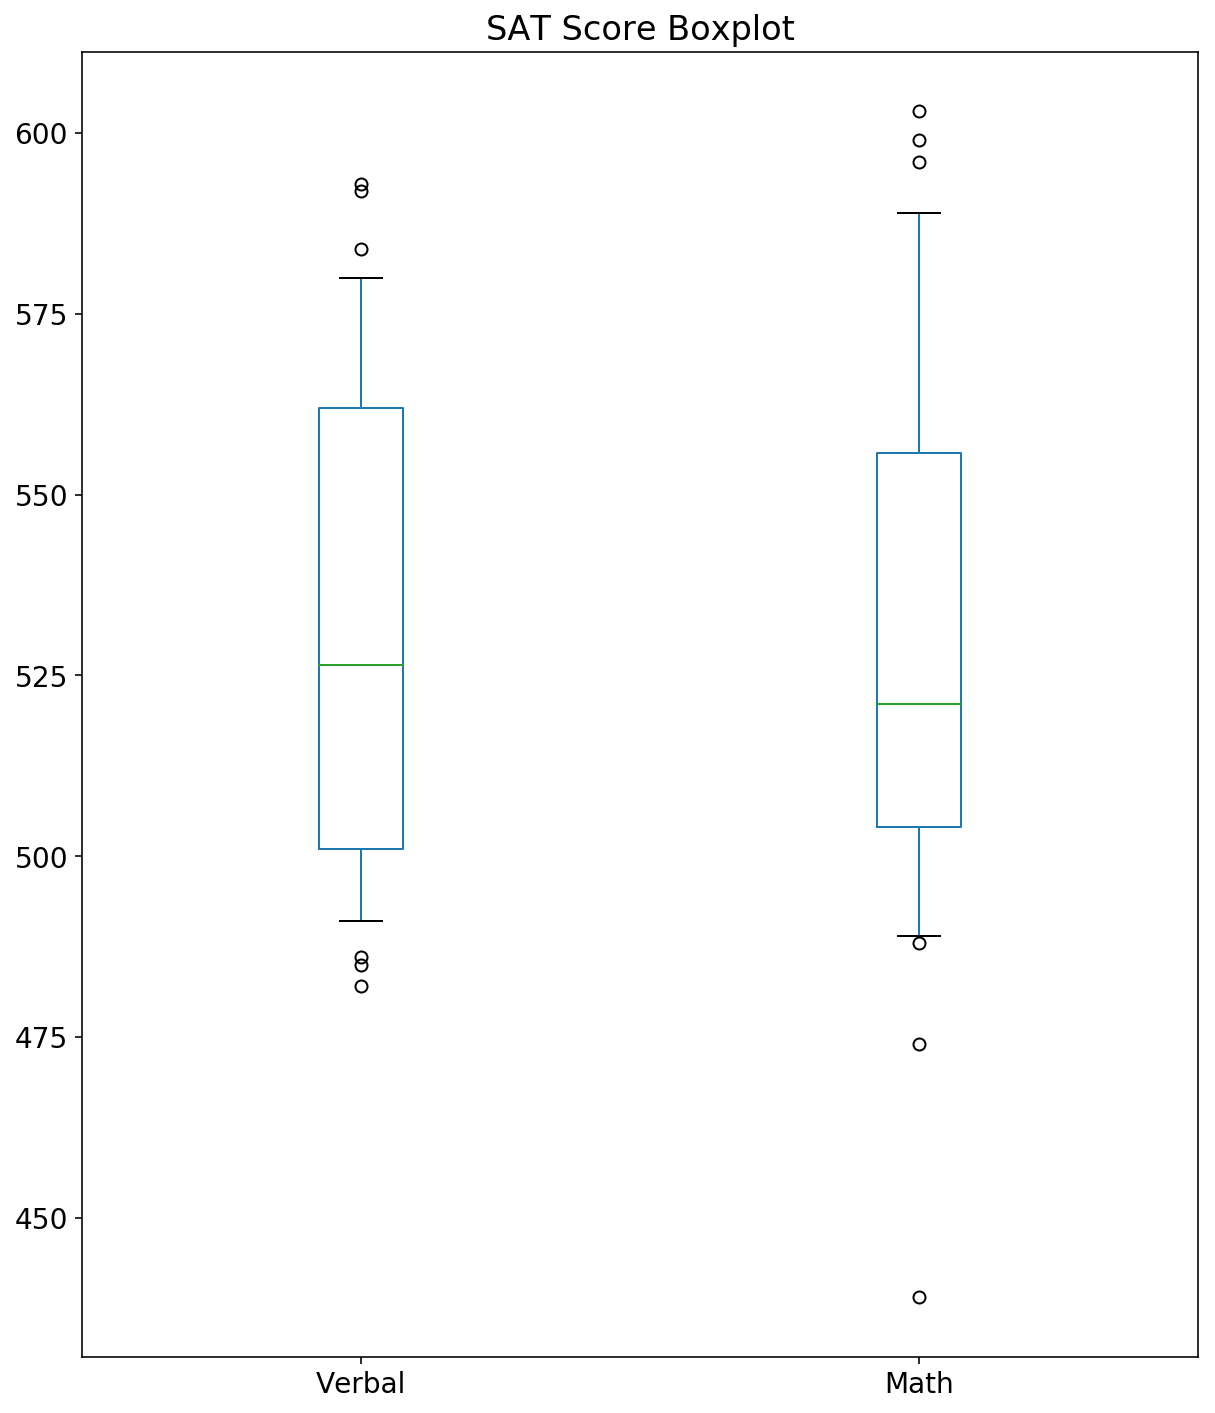

In [688]:
# with 2sigma for upper boundary (max) and lower boundry (min)
new_scores_df.boxplot(whis=[5, 95],grid=False,figsize=(10,12))
plt.title('SAT Score Boxplot')

#### Plotting with Seaborn with 5 percentile and 95 percentile to determine the outliers (not 1.5IQR)

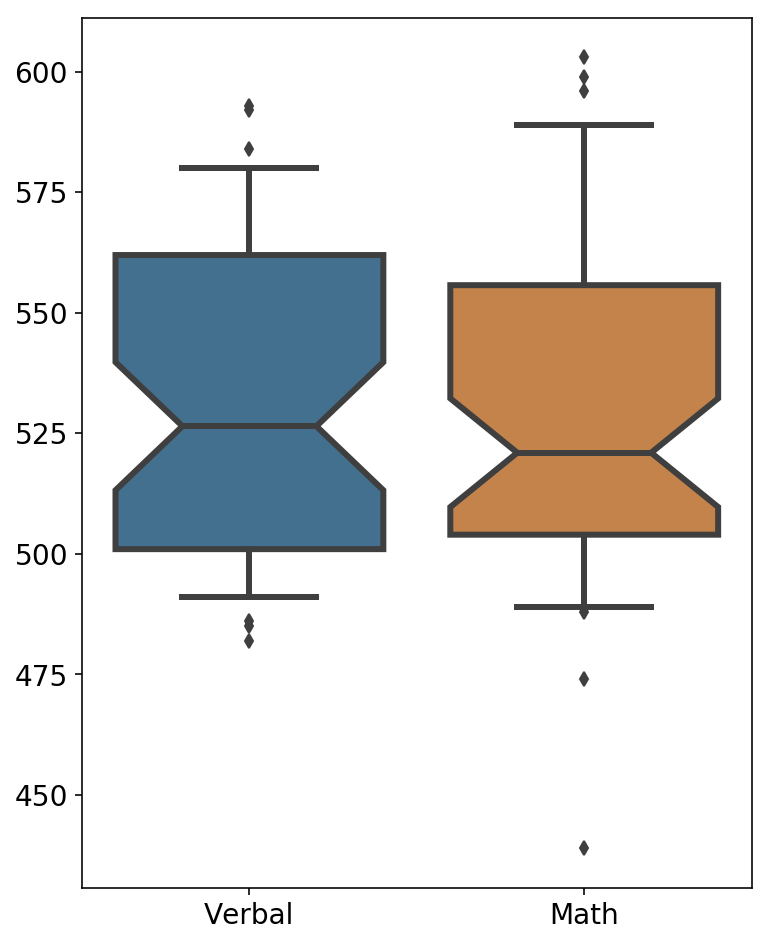

In [689]:
fig = plt.figure(figsize=(6,8))
ax = fig.gca()

ax = sns.boxplot(data=new_scores_df, whis=[5, 95], fliersize=5, linewidth=3, notch=True, saturation=0.5, ax=ax)

In [690]:
new_scores_df['Verbal'].describe([.05,.95])

count     52.000000
mean     532.019231
std       33.236225
min      482.000000
5%       488.750000
50%      526.500000
95%      581.800000
max      593.000000
Name: Verbal, dtype: float64

In [691]:
# Outliers for Verbal
print("Outliers for Verbal : \n{}".format(new_scores_df[
                (new_scores_df['Verbal'] > new_scores_df['Verbal'].describe([.05,.95])[6]) | 
                (new_scores_df['Verbal'] < new_scores_df['Verbal'].describe([.05,.95])[4])]))

Outliers for Verbal : 
   State  Verbal  Math
22    HI     485   515
45    WI     584   596
48    IA     593   603
50    ND     592   599
16    SC     486   488
17    DC     482   474


In [692]:
# Outliers for Math
print("Outliers for Verbal : \n{}".format(new_scores_df[
                (new_scores_df['Math'] > new_scores_df['Math'].describe([.05,.95])[6]) | 
                (new_scores_df['Math'] < new_scores_df['Math'].describe([.05,.95])[4])]))

Outliers for Verbal : 
   State  Verbal  Math
45    WI     584   596
48    IA     593   603
50    ND     592   599
16    SC     486   488
17    DC     482   474
28    OH     534   439


##### Answer :
- After the boundries of outliers are changed to 5 percentile and 95 percentile, there are 6 outliers each in both Verbal and Math as per chart and these outliers are overlapped as well.
- It's printed as above.


### Solution 8.4

In [706]:
new_scores_df_no_outliers = new_scores_df[
                ~((new_scores_df['Verbal'] > new_scores_df['Verbal'].describe([.05,.95])[6]) | 
                (new_scores_df['Verbal'] < new_scores_df['Verbal'].describe([.05,.95])[4]) |
                (new_scores_df['Math'] > new_scores_df['Math'].describe([.05,.95])[6]) | 
                (new_scores_df['Math'] < new_scores_df['Math'].describe([.05,.95])[4]))]
new_scores_df_no_outliers.describe()

,Verbal,Math
count,45.000000,45.000000
mean,531.311111,531.644444
std,29.947547,29.501275
min,491.000000,489.000000
25%,506.000000,506.000000
50%,526.000000,525.000000
75%,562.000000,553.000000
max,580.000000,589.000000


In [710]:
print("Mean of SAT :\n{}\n\nMean of SAT without Outliers :\n{}\n".format(np.mean(new_scores_df),
                                                                     np.mean(new_scores_df_no_outliers)))

Mean of SAT :
Verbal    532.019231
Math      531.500000
dtype: float64

Mean of SAT without Outliers :
Verbal    531.311111
Math      531.644444
dtype: float64



In [717]:
print("Median of SAT :\nVerbal   {}\nMath     {}\nMedian of SAT without Outliers :\nVerbal   {}\nMath     {}"
      .format(np.median(new_scores_df['Verbal']),
              np.median(new_scores_df['Math']),
              np.median(new_scores_df_no_outliers['Verbal']),
              np.median(new_scores_df_no_outliers['Math'])))

Median of SAT :
Verbal   526.5
Math     521.0
Median of SAT without Outliers :
Verbal   526.0
Math     525.0


In [718]:
print("Std. Dev. of SAT :\n{}\n\nStd. Dev. of SAT without Outliers :\n{}\n".format(np.std(new_scores_df),
                                                                     np.std(new_scores_df_no_outliers)))

Std. Dev. of SAT :
Verbal    32.915095
Math      35.666996
dtype: float64

Std. Dev. of SAT without Outliers :
Verbal    29.612927
Math      29.171642
dtype: float64



### Answer:
The differnce is that all mean, median and standard deviation are getting lower for the dataset without outliers. Having outliers can largely contribute to mean and standard deviation ,therefore a significant effect on the mean and standard deviation.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [727]:
stats.spearmanr(new_scores_df['Verbal'],new_scores_df['Math'])

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

In [728]:
new_scores_df.corr()

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


In [724]:
stats.spearmanr(new_scores_df_no_outliers['Verbal'],new_scores_df_no_outliers['Math'])

SpearmanrResult(correlation=0.9377480171901554, pvalue=2.293327270791186e-21)

In [723]:
new_scores_df_no_outliers.corr()

,Verbal,Math
Verbal,1.000000,0.969989
Math,0.969989,1.000000


### Answer :


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.